# **Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα**

## **Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository**
#### Μαρίνος Τζανίκος 03113147, el13147@mail.ntua.gr
#### Γιώργος Γκανάς 03116095, el16095@mail.ntua.gr
#### Παναγιώτης Αϊβασιλιώτης 03116176, el16176@mail.ntua.gr

In [1]:
!pip install --upgrade pip 
!pip install --upgrade scikit-learn 
!pip install --upgrade numpy 
!pip install --upgrade scipy 
!pip install --upgrade pandas 
!pip install --upgrade imbalanced-learn

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Μικρό Dataset (S06)**

####**Βασικές πληροφορίες**

**Εισαγωγή του dataset**

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/crx.data", header=None)
#Show the first 5 samples of the dataframe
df.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


**Παρουσίαση του dataset**

To dataset περιγράφει την έκβαση των αιτήσεων για πιστωτικές κάρτες με βάση κάποια χαρακτηριστικά.Δηλαδή αν η αίτηση κάποιου για πιστωτική κάρτα, εγκρίθηκε ή όχι.Στόχος μας είναι με χρήση επιβλεπόμενης μάθησης και χωρίς να ξέρουμε την πραγματική ερμηνεία των δεδομένων να δημιουργήσουμε ένα συστήμα που θα μπορεί να χαρακτηρίζει όσο το δυνατόν καλύτερα αν η έκβαση μίας υποψηφίας αίτησης θα είναι θετική ή αρνητική.

**Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Μη διατεταγμένα χαρακτηριστικά**

Το dataset περιέχει 690 δείγματα.Kάθε δείγμα αποτελείται από 15 χαρακτηριστικά τα οποία είναι κατηγορικά ή αριθμητικά και των οποίων η πραγματική ερμηνεία δεν μας δίνεται.Τα διατεταγμένα χαρακτηριστικά είναι μόνο τα αριθμητικά.Ακόμα κάθε δείγμα περιέχει μία ετικέτα που μας δείχνει την έκβαση που είχε η εν λόγω αίτηση.Πιο συγκεκριμένα έχουμε τα εξής σχετικά με τις πληροφορίες που περιέχει ένα δείγμα:

A1:	b, a.  
A2:	continuous.  
A3:	continuous.  
A4:	u, y, l, t.  
A5:	g, p, gg.  
A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.  
A7:	v, h, bb, j, n, z, dd, ff, o.  
A8:	continuous.  
A9: t, f.  
A10: t, f.  
A11: continuous.  
A12: t, f.  
A13: g, p, s.  
A14: continuous.  
A15: continuous.  
A16: +,- (class attribute)

Επομένως έχουμε οτι τα χαρακτηριστικά Α2,Α3,Α8,Α11,Α14,Α15 είναι συνεχή και τα υπόλοιπα 10 κατηγορικά.

**Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**

Όχι, τα δεδομένα μας βρίσκονται σε raw μορφή μέσα στο αρχείο και επομένως δεν έχουν ούτε επικεφαλίδες ούτε αρίθμηση γραμμών.

**Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**

Οι ετικέτες των κλάσεων βρίσκονται στην 16η κολόνα και είναι είτε "+" δηλαδή θετική έκβαση της αίτησης είτε "-" δηλαδή αρνητική έκβαση της αίτησης.

In [4]:
unique_labels = df.iloc[:,-1].unique()
print("Unique labels of samples: {0}".format(unique_labels))

Unique labels of samples: ['+' '-']


**Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?**

Οχι δεν χρειάστηκε να γίνει κάποια μετατροπή στα αρχεία text.

**Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Παρατηρούμε ότι οι απουσιάζουσες τιμές εμφανίζονται με "?" μέσα στο αρχείο εισόδου και δεν υπάρχει καμία απουσιάζουσα ετικέτα.

In [5]:
df.replace('?', np.NaN, inplace=True) # replace all ? with np.NaN


In [6]:
df.isnull().sum().sum() # how many missing values we have

67

In [7]:

sum([True for idx,row in df.iterrows() if any(row.isnull())]) # how many samples have missing values

37

Επομένως υπάρχουν συνολικά 67 απουσιάζουσες τιμές σε 37 εκ των δειγμάτων, που αντιστοιχούν στο 5,3% του συνόλου.

**Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Εκτιμήστε την ισορροπία του dataset.**

In [8]:
#Just a map so we can use bincount
labels_df = df.iloc[:,-1] # labels in the last column
features_df = df.iloc[:,:-1] # features in all columns but the last

mapping = {"-" : 0, "+" : 1} # mapping for labels
labels_df = labels_df.replace(mapping)

np_labels = labels_df.values.flatten() # convert labels dataframe to numpy array
frequencies = np.bincount(np_labels)
total_samples = np_labels.shape[0]
percentages = (frequencies / total_samples) * 100

print("Class frequencies: {0}".format(frequencies))

print("Class percentages: {0}".format(percentages))

Class frequencies: [383 307]
Class percentages: [55.50724638 44.49275362]


Βλέπουμε ότι τα ποσοστά δειγμάτων επί του συνόλου των δύο κλάσεων βρίσκονται κοντά στο 50%, επομένως το dataset είναι ισορροπημένο.

**Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα
χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**

Αφού χωρίσουμε το dataset σε train και test set θα αντικαταστήσουμε τις απουσιάζουσες τιμές καθώς η είσοδος στους αλγορίθμους μηχανικής μάθησης πρέπει να είναι πλήρης.Για το λόγο αυτόν,
Θα χρησιμοποιήσουμε το μετασχηματιστή “Imputer” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές).
Ο μετασχηματισμός με Imputer γίνεται στην απόλυτη αρχή της προεπεξεργασίας.
Ακόμα στο train_test_split ενεργοποιήσαμε την επιλογή stratify ώστε να έχουμε ένα πιο ισορροπημένο train set.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Split our dataframe intο train and test set
trainData, testData, trainLabels, testLabels = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2,stratify=df.iloc[:,-1],random_state=17)

#Split dataframes into categorical and continuous features dataframes
trainData_continuous = trainData.drop([0,3,4,5,6,8,9,11,12], axis=1)
trainData_categorical = trainData.drop([1,2,7,10,13,14], axis=1)
testData_continuous = testData.drop([0,3,4,5,6,8,9,11,12], axis=1)
testData_categorical = testData.drop([1,2,7,10,13,14], axis=1)

#Impute the missing values on continuous features
imp = SimpleImputer(missing_values=np.NaN,strategy='mean')
itrainData_continuous = pd.DataFrame(imp.fit_transform(trainData_continuous))
itrainData_continuous.columns=[1,2,7,10,13,14]
itestData_continuous = pd.DataFrame(imp.fit_transform(testData_continuous))
itestData_continuous.columns=[1,2,7,10,13,14]

#Impute the missing values on categorical features
imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
itrainData_categorical = pd.DataFrame(imp.fit_transform(trainData_categorical))
itrainData_categorical.columns=[0,3,4,5,6,8,9,11,12]
itestData_categorical = pd.DataFrame(imp.fit_transform(testData_categorical))
itestData_categorical.columns=[0,3,4,5,6,8,9,11,12]

#Merge dataframes and reorder indexes to form the original ones imputed
itrainData = pd.concat([itrainData_categorical, itrainData_continuous], axis=1)
itrainData = itrainData.reindex(sorted(itrainData.columns), axis=1)
itestData = pd.concat([itestData_categorical, itestData_continuous], axis=1)
itestData = itestData.reindex(sorted(itestData.columns), axis=1)

#Convert categorical features to binary , we have to join the two data before this step
Data_dummies = pd.get_dummies(pd.concat([itrainData,itestData], join="outer", axis=0),columns=[0,3,4,5,6,8,9,11,12])
trainData_dummies = Data_dummies.iloc[:itrainData.shape[0],:]
testData_dummies = Data_dummies.iloc[itrainData.shape[0]:,:]

#Convert to numeric values and numpy arrays
np_trainData = trainData_dummies.apply(pd.to_numeric).values
np_testData = testData_dummies.apply(pd.to_numeric).values
np_trainLabels = trainLabels.values.flatten()
np_testLabels =  testLabels.values.flatten()

#Giving symbolic ml names to our arrays 
X_train = np_trainData
y_train = np_trainLabels
X_test =  np_testData
y_test =  np_testLabels

####**Baseline classification**

Αρχικά υλοποιήσαμε τους ταξινομητές που ζητούνται χωρίς καμία βελτιστοποίηση στο κόμματι του preproccesing ή των υπερπαραμέτρων του ταξινομητή.

Για κάθε ταξινομητή που ζητείται υπολογίσαμε τις μετρικές f1_micro avg και f1_macro avg καθώς και τους πίνακες σύγχυσης για την εκτίμηση του στο test set.Ακόμα για τους ταξινομητές kNN και GNB
υπολογίζουμε και την μετρική f1_macro avg και f1_micro avg με χρηση 10-fold cross validation στο training set ώστε να συγκρίνουμε την απόδοση της βελτιστοποίησης που θα γίνει σε επόμενο βήμα.

Για την εμφάνιση των μετρικών χρησιμοποιήσαμε την συνάρτηση `classification_report` του sklearn η οποία εμφανίζει τις μετρικές precision, recall, f1, support για micro avg, macro avg, weighted avg  συνολικά καθώς και για κάθε κλάση ξεχωριστά, υπογραμμίζουμε οτι το micro avg εμφανίζεται ως accuracy.

Τέλος παρατηρήσαμε πως το sklearn χρησιμοποιεί StratifiedKFold ως default επιλογή στα binary classification.

#####**Dummy Classifiers**

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_minus = DummyClassifier(strategy="constant", constant="-")
dc_constant_plus = DummyClassifier(strategy="constant", constant="+")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

dc_uniform.fit(X_train, y_train)
dc_constant_minus.fit(X_train, y_train)
dc_constant_plus.fit(X_train, y_train)
dc_most_frequent.fit(X_train, y_train)
dc_stratified.fit(X_train, y_train)

pred_uni = dc_uniform.predict(X_test)
pred_const_minus = dc_constant_minus.predict(X_test)
pred_const_plus = dc_constant_plus.predict(X_test)
pred_freq = dc_most_frequent.predict(X_test)
pred_strat = dc_stratified.predict(X_test)

print("The DummyClassifier with uniform strategy has scores on test set : \n" + classification_report(y_test,pred_uni))
print("The DummyClassifier with constant minus strategy has scores on test set : \n" + classification_report(y_test,pred_const_minus))
print("The DummyClassifier with constant plus strategy has scores on test set : \n" + classification_report(y_test,pred_const_plus))
print("The DummyClassifier with frequent strategy has scores on test set : \n" + classification_report(y_test,pred_freq))
print("The DummyClassifier with stratified strategy has scores on test set : \n" + classification_report(y_test,pred_strat))

The DummyClassifier with uniform strategy has scores on test set : 
              precision    recall  f1-score   support

           +       0.38      0.39      0.39        61
           -       0.51      0.49      0.50        77

    accuracy                           0.45       138
   macro avg       0.44      0.44      0.44       138
weighted avg       0.45      0.45      0.45       138

The DummyClassifier with constant minus strategy has scores on test set : 
              precision    recall  f1-score   support

           +       0.00      0.00      0.00        61
           -       0.56      1.00      0.72        77

    accuracy                           0.56       138
   macro avg       0.28      0.50      0.36       138
weighted avg       0.31      0.56      0.40       138

The DummyClassifier with constant plus strategy has scores on test set : 
              precision    recall  f1-score   support

           +       0.44      1.00      0.61        61
           -       0

#####**Gausian Naive Bayes**

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
f1_micro_score_gnb = cross_val_score(gnb, X_train, y_train, cv=10, scoring='f1_micro')
f1_macro_score_gnb = cross_val_score(gnb, X_train, y_train, cv=10, scoring='f1_macro')

pred_gnb = gnb.predict(X_test)

print("The GaussianNB Classifier has f1_micro score on training set : %f \n" % (f1_micro_score_gnb.mean()))
print("The GaussianNB Classifier has f1_macro score on training set : %f \n" % (f1_macro_score_gnb.mean()))
print("The GaussianNB Classifier has scores on test set : \n" + classification_report(y_test,pred_gnb))

The GaussianNB Classifier has f1_micro score on training set : 0.831526 

The GaussianNB Classifier has f1_macro score on training set : 0.826075 

The GaussianNB Classifier has scores on test set : 
              precision    recall  f1-score   support

           +       0.87      0.79      0.83        61
           -       0.84      0.91      0.88        77

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138



#####**k Nearest Neighbors Classifier (kNN) με k=5**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# kNN Classifier, default k=5
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
f1_micro_score_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring="f1_micro")
f1_macro_score_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring="f1_macro")

pred_knn = knn.predict(X_test)

print("The KNeighborsClassifier with k=" + str(knn.n_neighbors) + " has f1_micro score on training set : %f \n" % (f1_micro_score_knn.mean()))
print("The KNeighborsClassifier with k=" + str(knn.n_neighbors) + " has f1_macro score on training set : %f \n" % (f1_macro_score_knn.mean()))
print("The KNeighborsClassifier with k=" + str(knn.n_neighbors) + " has scores on test set : \n" + classification_report(y_test,pred_knn))


The KNeighborsClassifier with k=5 has f1_micro score on training set : 0.655942 

The KNeighborsClassifier with k=5 has f1_macro score on training set : 0.641376 

The KNeighborsClassifier with k=5 has scores on test set : 
              precision    recall  f1-score   support

           +       0.75      0.62      0.68        61
           -       0.74      0.83      0.78        77

    accuracy                           0.74       138
   macro avg       0.74      0.73      0.73       138
weighted avg       0.74      0.74      0.74       138



#####**Confusion Matrices - Πίνακες Σύγχυσης**

H συνάρτηση `plot_cnf_clfs` δέχεται ως ορίσματα τους ταξινομητές μαζί με τα predictions που έγιναν για το test set και με την βοηθεια της matplotlib σχεδιάζει τα confusion matrices για τα εν λόγω αποτελέσματα.

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def plot_cnf_clfs(clfs, preds, y_test, classes):
  for clf, pred in zip(clfs, preds):
    clf_name = str(clf).split("(")[0]
    if (clf_name == "Pipeline"):
        clf = clf.steps[-1][1]

    clf_name = str(clf).split("(")[0]    
    if (clf_name == "DummyClassifier"):
        clf_name = clf_name + " strategy=" + str(clf.strategy)
        if (clf.constant):
          clf_name = clf_name + " constant=" + str(clf.constant)
    elif (clf_name == "GaussianNB"):
        clf_name = clf_name
    elif (clf_name == "MLPClassifier"):
        clf_name = clf_name    
    elif (clf_name == "KNeighborsClassifier"):
        clf_name = clf_name + " n_neighbors=" + (str(clf.n_neighbors))
    elif (clf_name == "LinearSVC"):
      clf_name = "Linear SVM"
    elif (clf_name == "SVC"):
      clf_name = (str(clf.kernel)) + " SVM"
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,pred),display_labels=classes)
    disp = disp.plot(include_values=True,cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal')
    disp.ax_.set_title(clf_name)

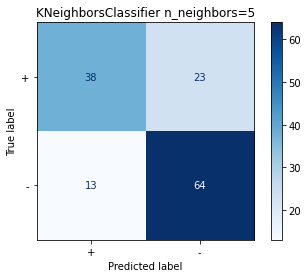

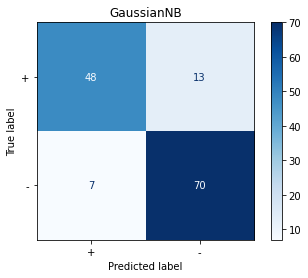

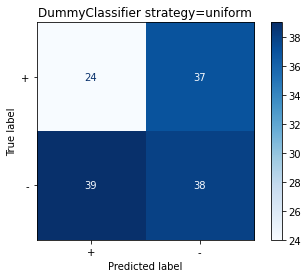

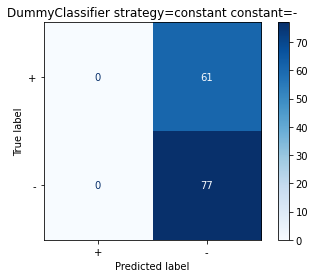

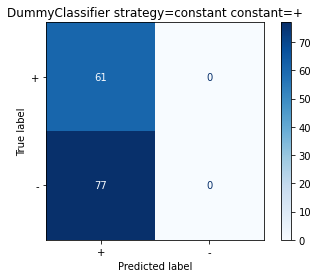

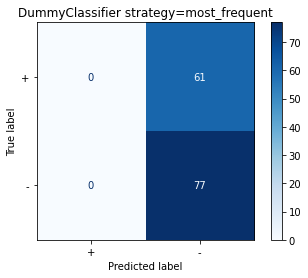

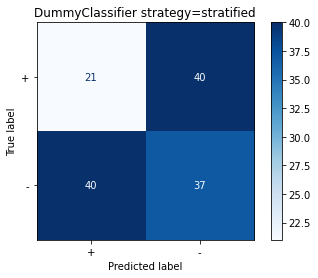

In [14]:
#For all classifiers plot the cnf matrix
clfs = [knn, gnb, dc_uniform, dc_constant_minus, dc_constant_plus, dc_most_frequent, dc_stratified]
preds =[pred_knn, pred_gnb, pred_uni, pred_const_minus, pred_const_plus, pred_freq, pred_strat]
plot_cnf_clfs(clfs, preds, y_test,["+", "-"])

#####**Bar Plots για f1 scores**

Η συνάρτηση `barplot_clfs` δέχεται ως ορίσματα τους ταξινομητές μαζί με τα predictions που έγιναν για το test set και με την βοηθεια της matplotlib σχεδιάζει τα bar plot των μετρικών f1_micro avg και f1_macro avg για κάθε ταξινομητη.

In [15]:
from sklearn.metrics import precision_recall_fscore_support

def barplot_clfs(clfs, preds, y_test):
  #Bar plot values
  f1_micros = []
  f1_macros = []
  f1_weighteds = []
  clf_names = []
  #For each classifier find name,f1_micro,f1_macro,f1_weighted and save them
  for clf, pred in zip(clfs,preds):
    clf_name = str(clf).split("(")[0]
    if (clf_name == "Pipeline"):
        clf = clf.steps[-1][1]
    clf_name = str(clf).split("(")[0]
    if (clf_name == "DummyClassifier"):
        clf_name = "dc " + clf.strategy
        if (clf.constant):
          clf_name = clf_name + str(clf.constant)
    elif (clf_name == "GaussianNB"):
        clf_name = "GNB"
    elif (clf_name == "MLPClassifier"):
        clf_name = "MLP"    
    elif (clf_name == "KNeighborsClassifier"):
       clf_name = "kNN" + " k=" + (str(clf.n_neighbors))
    elif (clf_name == "LinearSVC"):
      clf_name = "Linear SVM"
    elif (clf_name == "SVC"):
      clf_name = (str(clf.kernel)) + " SVM"
    f1_micro = precision_recall_fscore_support(y_test, pred, average='micro')[2]
    f1_macro = precision_recall_fscore_support(y_test, pred, average='macro')[2]
    f1_weighted = precision_recall_fscore_support(y_test, pred, average='weighted')[2]
    f1_micros.append(f1_micro)
    f1_macros.append(f1_macro)
    f1_weighteds.append(f1_weighted)
    clf_names.append(clf_name)
  #Create the 1st plot f1_micro
  fig = plt.figure(figsize = (15, 5)) 
  plt.figure(1)
  plt.bar(clf_names, f1_micros,  
        width = 0.4)
  plt.ylabel("f1_micro score") 
  plt.title("f1_micro")
  #Create the 2nd plot f1_macro
  fig = plt.figure(figsize = (15, 5))
  plt.figure(2)
  plt.bar(clf_names, f1_macros,  
        width = 0.4)
  plt.ylabel("f1_macro score") 
  plt.title("f1_macro")
  #Create the 3rd plot f1_weighted
  fig = plt.figure(figsize = (15, 5))
  plt.figure(3)
  plt.bar(clf_names, f1_weighteds,  
        width = 0.4)
  plt.ylabel("f1_weighted score") 
  plt.title("f1_weighted")
  plt.show()

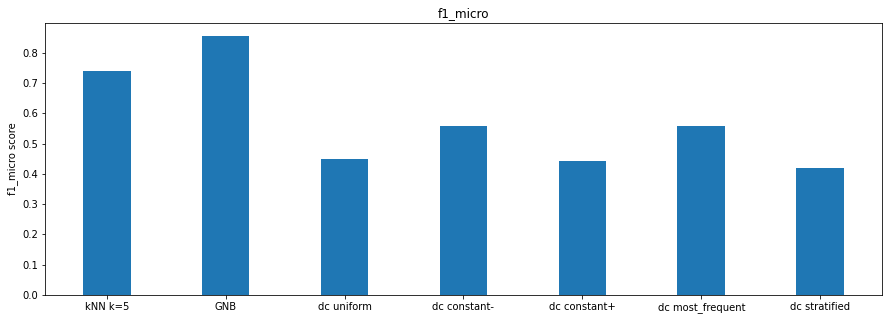

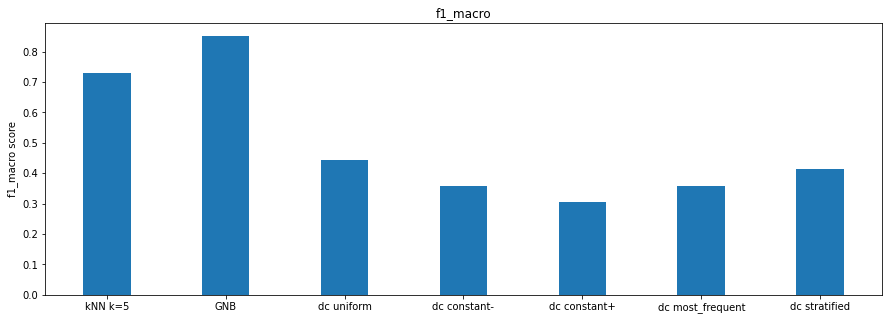

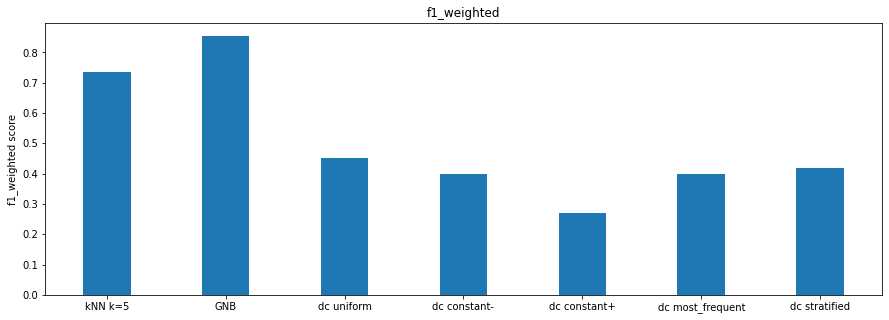

In [16]:
barplot_clfs(clfs,preds,y_test)

#####**Σχολιασμός Αποτελεσμάτων**

Παρατηρούμε οτι για avg micro έχουμε οι τιμές precision, recall και f1 είναι όλες ίσες για τον κάθε ταξινομητή.Αυτό συμβαίνει διότι στο avg micro πρώτα συμψηφίζονται τα TruePositive,FalsePositive,FalseNegative για όλες τις κλάσεις και μετά υπολογίζονται οι μετρικές precision, recall και f1.Επομένως τα FalsePositive της μίας κλάσης θα είναι ίσα με τα FalseNegative της άλλης.Αντίθετα στο avg macro η κάθε κλάση υπολογίζει τα precision, recall και f1 για τον εαυτό της και τελικά συμψηφίζουμε τις μετρικές για όλες τις κλάσεις.

Στα bar plots βλέπουμε ότι ο GNB έχει την καλύτερη απόδοση, έπειτα ακολουθεί ο kNN και στο τέλος οι dummy ταξινομητές.




####**Βελτιστοποίηση ταξινομητών**

Για κάθε ταξινομητή προσπαθούμε να βελτιώσουμε την απόδοση του στο training set με κάποιον συνδιασμό των VarianceThreshold, StandardScaler, MinMaxScaler και PCA.Ως κριτήριο βελτιστοποίησης θα χρησιμοποιήσουμε την μετρική f1_macro καθώς και την μετρική f1_micro.Εκ των δύο μόντελων θα επιλεχθεί αυτό με την καλύτερη απόδοση στο test set.Αφού επιτεχθούν, θα κάνουμε ένα predict στο test set ώστε να δούμε και την απόδοση του βελτιστοποιήμενου ταξινομητή στο test set.

#####**Dummy Classifiers**

Για τη βελτιστοποίηση των dummy ταξινομητών, θα εφαρμόσουμε τα στάδια προεπεξεργασίας VarianceThreshold, StandardScaler και PCA.

Για κάθε ταξινομητή κατασκευάζουμε ένα pipe χρησιμοποιώντας αυτούς τους μετασχηματιστές.

In [17]:
from sklearn.pipeline import Pipeline
#from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
#ros = RandomOverSampler()
mscaler = MinMaxScaler()
sscaler = StandardScaler()
pca = PCA()

pipe_uniform = Pipeline(steps=[('selector', selector), ('scaler', sscaler), ('pca', pca)\
                               , ('dc_uniform', dc_uniform)], memory = 'tmp')
pipe_constant_minus = Pipeline(steps=[('selector', selector), ('scaler', sscaler), ('pca', pca)\
                                      , ('dc_constant_minus', dc_constant_minus)], memory = 'tmp')
pipe_constant_plus = Pipeline(steps=[('selector', selector), ('scaler', sscaler), ('pca', pca)\
                                     , ('dc_constant_plus', dc_constant_plus)], memory = 'tmp')
pipe_most_frequent = Pipeline(steps=[('selector', selector), ('scaler', sscaler), ('pca', pca)\
                               , ('dc_most_frequent', dc_most_frequent)], memory = 'tmp')
pipe_stratified = Pipeline(steps=[('selector', selector), ('scaler', sscaler), ('pca', pca)\
                               , ('dc_stratified', dc_stratified)], memory = 'tmp')

Στο στάδιο, αυτό εξετάζουμε τα αποτελέσματα της προεπεξεργασίας με default υπερπαραμέτρους,δηλαδή προτού εφαρμόσουμε grid search/cross-validation, ώστε να επιλέξουμε τις βέλτιστες υπερπαραμέτρους. Ωστόσο όπως παρατηρούμε τα αποτελέσματα παραμένουν ίδια (οι διαφορές στους uniform και stratified ταξινομητές προκύπτουν λόγω της τυχαιότητας αυτών) ανεξάρτητα της επιλογής μετασχηματιστών, οπότε για συντομία εδώ παρουσιάζουμε τα αποτελέσματα μόνο για τον πλήρη συνδυασμό.

In [18]:
pipes_dc = [pipe_uniform, pipe_constant_minus, pipe_constant_plus, pipe_most_frequent, pipe_stratified]

for pipe in pipes_dc:
  dummy_pipe_name = str(pipe[-1]).split("(")[0]
  dummy_pipe_strategy = pipe[-1].strategy
  dummy_pipe_constant = pipe[-1].constant
  pipe.fit(X_train,y_train)
  pipe_pred = pipe.predict(X_test) 
  if (dummy_pipe_constant == None):
    print("The DummyClassifier with " + dummy_pipe_strategy + " strategy and preprocessing with default parameters has scores on test set : \n" + classification_report(y_test,pipe_pred))
  elif (dummy_pipe_constant == "+"):
    print("The DummyClassifier with " + dummy_pipe_strategy + " plus strategy and preprocessing with default parameters has scores on test set : \n" + classification_report(y_test,pipe_pred))
  elif (dummy_pipe_constant == "-"):
    print("The DummyClassifier with " + dummy_pipe_strategy + " minus strategy and preprocessing with default parameters has scores on test set : \n" + classification_report(y_test,pipe_pred))  
  

The DummyClassifier with uniform strategy and preprocessing with default parameters has scores on test set : 
              precision    recall  f1-score   support

           +       0.42      0.46      0.44        61
           -       0.54      0.51      0.52        77

    accuracy                           0.49       138
   macro avg       0.48      0.48      0.48       138
weighted avg       0.49      0.49      0.49       138

The DummyClassifier with constant minus strategy and preprocessing with default parameters has scores on test set : 
              precision    recall  f1-score   support

           +       0.00      0.00      0.00        61
           -       0.56      1.00      0.72        77

    accuracy                           0.56       138
   macro avg       0.28      0.50      0.36       138
weighted avg       0.31      0.56      0.40       138

The DummyClassifier with constant plus strategy and preprocessing with default parameters has scores on test set : 
   

Στη συνέχεια θα εκτελέσουμε αναζήτηση πλέγματος στην υπερπαράμετρο threshold του selector και του αριθμού χαρακτηριστικών που δίνει ο PCA. Για να κατασκευάσουμε το κατάλληλο πλέγμα, επισκοπούμε τη διακύμανση των χαρακτηριστικών

In [19]:
train_variance = X_train.var(axis=0)
train_variance.sort()
print(train_variance)
print(np.max(train_variance))

[1.80831233e-03 3.61006091e-03 3.61006091e-03 3.61006091e-03
 5.40524575e-03 8.97592418e-03 8.97592418e-03 1.07514178e-02
 1.25203476e-02 1.25203476e-02 3.65961720e-02 3.65961720e-02
 5.13941399e-02 5.30055398e-02 5.46103760e-02 6.56604442e-02
 7.02977316e-02 7.48759452e-02 7.63888889e-02 7.63888889e-02
 7.78952689e-02 8.53287125e-02 8.82561437e-02 9.54598561e-02
 9.54598561e-02 1.64930556e-01 1.69105099e-01 1.86590921e-01
 1.86590921e-01 1.88402515e-01 1.88402515e-01 2.11008060e-01
 2.11008060e-01 2.44210775e-01 2.44749002e-01 2.44749002e-01
 2.47427011e-01 2.47427011e-01 2.49527410e-01 2.49527410e-01
 1.09272920e+01 1.51980906e+01 2.47696854e+01 1.37826703e+02
 2.87872749e+04 3.17589902e+07]
31758990.155846328


Στη φάση αυτή, εκτελούμε την αναζήτηση πλέγματος στα pipes των dummy ταξινομητών και εφαρμόζουμε τα αποτελέσματα στα δεδομένα. Δεχόμαστε έτσι τις τελικές μετρικές των βελτιστοποιημένων ταξινομητών.

In [20]:
import time
from sklearn.model_selection import GridSearchCV

#Grid Search for dummy classifiers
vthreshold = [0, 1e-02, 6e-02, 1e-01, 2e-01, 1]
n_components = [2, 10, 20, 30, 40, 45]

pred_pipes_dc = []
time_pipes_dc = []


print("---------------f1_macro optimized dummy classifiers---------------")
for pipe in pipes_dc:
  dummy_name = str(pipe[-1]).split("(")[0]
  dummy_strategy = pipe[-1].strategy
  dummy_constant = pipe[-1].constant
  estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components),\
                                      cv=10, scoring='f1_macro', n_jobs=-1)
  start_time = time.time()
  estimator.fit(X_train, y_train)
  pred = estimator.predict(X_test)
  pred_pipes_dc.append(pred)
  time_pipes_dc.append(time.time() - start_time)
  if (dummy_constant == None):
    print("The optimized DummyClassifier with " + dummy_strategy + " strategy has score on test set : \n" + classification_report(y_test,pred))
  elif (dummy_constant == "+"):
    print("The optimized DummyClassifier with " + dummy_strategy + " plus strategy has score on test set : \n" + classification_report(y_test,pred))
  elif (dummy_constant == "-"):
    print("The optimized DummyClassifier with " + dummy_strategy + " minus strategy has score on test set : \n" + classification_report(y_test,pred))
  print("with best parameters")
  print(estimator.best_params_)
  print("\n")

print("---------------f1_micro optimized dummy classifiers---------------")
for pipe in pipes_dc:
  dummy_name = str(pipe[-1]).split("(")[0]
  dummy_strategy = pipe[-1].strategy
  dummy_constant = pipe[-1].constant
  estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components),\
                                      cv=10, scoring='f1_micro', n_jobs=-1)
  estimator.fit(X_train, y_train)
  pred = estimator.predict(X_test)
  if (dummy_constant == None):
    print("The optimized DummyClassifier with " + dummy_strategy + " strategy has score on test set : \n" + classification_report(y_test,pred))
  elif (dummy_constant == "+"):
    print("The optimized DummyClassifier with " + dummy_strategy + " plus strategy has score on test set : \n" + classification_report(y_test,pred))
  elif (dummy_constant == "-"):
    print("The optimized DummyClassifier with " + dummy_strategy + " minus strategy has score on test set : \n" + classification_report(y_test,pred))
  print("with best parameters")
  print(estimator.best_params_)
  print("\n")
  

---------------f1_macro optimized dummy classifiers---------------
The optimized DummyClassifier with uniform strategy has score on test set : 
              precision    recall  f1-score   support

           +       0.33      0.34      0.34        61
           -       0.47      0.45      0.46        77

    accuracy                           0.41       138
   macro avg       0.40      0.40      0.40       138
weighted avg       0.41      0.41      0.41       138

with best parameters
{'pca__n_components': 20, 'selector__threshold': 0.06}


The optimized DummyClassifier with constant minus strategy has score on test set : 
              precision    recall  f1-score   support

           +       0.00      0.00      0.00        61
           -       0.56      1.00      0.72        77

    accuracy                           0.56       138
   macro avg       0.28      0.50      0.36       138
weighted avg       0.31      0.56      0.40       138

with best parameters
{'pca__n_components

Παρατηρούμε όμως ότι πάλι τα αποτελέσματα δεν είναι διαφορετικά, παρά την προσπάθεια βελτιστοποίησης. Αυτό όμως είναι και το αναμενόμενο αποτέλεσμα, αφού οι dummy ταξινομητές δεν εξετάζουν τα δεδομένα σε αρκετό βάθος ώστε να έχει σημασία η προεπεξεργασία. Συγκεκριμένα, οι σταθεροί ταξινομητές, προφανώς θα έχουν πάντα την ίδια απόδοση, ενώ και ο most frequent διατηρεί τα ίδια αποτελέσματα, εφόσον η πιο συχνή ετικέτα δεν αλλάζει. Όσο για τους uniform και stratified ταξινομητές, παρατηρείται μία απόκλιση από το αρχικά αποτελέσματα, ωστόσο αυτή είναι κάθε φορά διαφορετική και τυχαία. Εντελώς, στην πρώτη περίπτωση, ενώ στη δεύτερη αφού δεν αφαιρούμε γραμμές από τα δεδομένα μας, οι προβλέψεις θα γίνονται πάντα με την ίδια πιθανότητα.Για την εμφάνιση των bar_plots και των πινάκων σύγχυσης θα κρατήσουμε μόνο τα αποτελέσματα των f1_macro καθώς εδώ η σύγκριση των αποτελεσμάτων με scoring f1_micro και f1_macro και συνεπώς η επιλογή του κατάλληλου μοντέλου δεν εχεί νόημα. 

#####**Gaussian Naives Bayes**

In [21]:
pipe_gnb = Pipeline(steps=[('mscaler', mscaler), ('selector', selector), ('pca', pca), ('gnb', gnb)],memory="tmp")

Όπως πριν θα εξέτασουμε τα αποτελέσματα της προεπεξεργασίας προτού γίνει αναζήτηση βέλτιστων υπερπαραμέτρων.

In [22]:
pipe_gnb.fit(X_train, y_train)
pred_pipe_gnb = pipe_gnb.predict(X_test)
f1_micro_score_pipe_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=10, scoring='f1_micro')
f1_macro_score_pipe_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=10, scoring='f1_macro')

print("The GaussianNB Classifier with default preprocessing has f1_micro score on training set : %f \n" % (f1_micro_score_pipe_gnb.mean()))
print("The GaussianNB Classifier with default preprocessing has f1_macro score on training set : %f \n" % (f1_macro_score_pipe_gnb.mean()))
print("The GaussianNB Classifier with default preprocessing parameters has scores on test set: \n" + classification_report(y_test,pred_pipe_gnb))

The GaussianNB Classifier with default preprocessing has f1_micro score on training set : 0.744578 

The GaussianNB Classifier with default preprocessing has f1_macro score on training set : 0.729866 

The GaussianNB Classifier with default preprocessing parameters has scores on test set: 
              precision    recall  f1-score   support

           +       0.79      0.61      0.69        61
           -       0.74      0.87      0.80        77

    accuracy                           0.75       138
   macro avg       0.76      0.74      0.74       138
weighted avg       0.76      0.75      0.75       138



Τώρα θα δούμε τις τιμές του variance μετά την εφαρμογή του MinMaxScaler ώστε να ορίσουμε κάταλληλο διάστημα για το VarianceThreshold.

In [23]:
mscaler.fit(X_train)
X_train_scaled = mscaler.transform(X_train)
train_variance = X_train_scaled.var(axis=0)
train_variance.sort()
print(train_variance)
print(np.max(train_variance))

[0.00180831 0.0031759  0.00361006 0.00361006 0.00361006 0.00540525
 0.00719682 0.00897592 0.00897592 0.01075142 0.01252035 0.01252035
 0.02731823 0.02872985 0.03254155 0.03571526 0.03659617 0.03659617
 0.05139414 0.05300554 0.05461038 0.06566044 0.07029773 0.07487595
 0.07638889 0.07638889 0.07789527 0.08532871 0.08825614 0.09545986
 0.09545986 0.16493056 0.1691051  0.18659092 0.18659092 0.18840252
 0.18840252 0.21100806 0.21100806 0.24421078 0.244749   0.244749
 0.24742701 0.24742701 0.24952741 0.24952741]
0.24952741020793948


Εδώ βλέπουμε πως ο ίδιος ταξινομητής μαζί με την προεπεξεργασία με τις default υπερπαραμέτρους έχει μικρότερη απόδοση στο training set.Παράλληλα βλέπουμε οτι η απόδοση στο test set έχει επίσης μικρύνει.

Έπειτα θα εφαρμόσαμε αναζήτηση πλέγματος ώστε να βρούμε τις βέλτιστες υπερπαραμέτρους για την προεπεξεργασία για τις οποίες θα έχουμε ακόμα καλύτερη αποδοσή απο τον ταξινομητή χωρίς προεπεξεργασία.Παρουσίαζουμε παρακάτω τα βήματα, βάζοντας σε σχόλια τα αρχικά gridsearch και κρατώντας μόνο αύτο που επιλέξαμε ως βέλτιστο.

In [24]:
"""
vthreshold = [0, 1e-02, 6e-02, 1e-01, 2e-01, 3e-01]
n_components = [2, 10, 20, 30, 40, 45]

estimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro',n_jobs=-1)
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
print("The GaussianNB Classifier optimized by f1_macro has f1_macro score on training set : %f \n" % (estimator.best_score_))
print("The GaussianNB Classifier optimized by f1_macro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

print("\n")

estimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro',n_jobs=-1)
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
print("The GaussianNB Classifier optimized by f1_micro has f1_micro score on training set : %f \n" % (estimator.best_score_))
print("The GaussianNB Classifier optimized by f1_micro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)
"""

'\nvthreshold = [0, 1e-02, 6e-02, 1e-01, 2e-01, 3e-01]\nn_components = [2, 10, 20, 30, 40, 45]\n\nestimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring=\'f1_macro\',n_jobs=-1)\nestimator.fit(X_train,y_train)\nestimator_pred = estimator.predict(X_test)\nprint("The GaussianNB Classifier optimized by f1_macro has f1_macro score on training set : %f \n" % (estimator.best_score_))\nprint("The GaussianNB Classifier optimized by f1_macro has scores on test set : \n" + classification_report(y_test,estimator_pred))\nprint("with best parameters")\nprint(estimator.best_params_)\n\nprint("\n")\n\nestimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring=\'f1_micro\',n_jobs=-1)\nestimator.fit(X_train,y_train)\nestimator_pred = estimator.predict(X_test)\nprint("The GaussianNB Classifier optimized by f1_micro has f1_micro score on training set : %f \n" % (estimator.best_scor

Εδώ βλέπουμε οτι οι δύο μετρικές f1_macro και f1_micro δίνουν προς το παρόν τις ίδιες βέλτιστες υπερπαραμέτρους vthreshold = 0,06 και n_components = 10.Θα ελέγξουμε αν υπάρχει περιθώριο βελτίωσης του ταξινομήτη ελέγχοντας κάποιες τιμές κοντά στις τιμές που βρήκαμε, πραγματοποιώντας ουσιαστικά μία progressive αναζήτηση πλέγματος.

In [25]:
vthreshold = [3e-02, 6e-02, 9e-02]
n_components = [6, 7, 8, 9, 10, 11, 12, 13, 14]

estimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro',n_jobs=-1)
start_time = time.time()
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
estimator_time = time.time() - start_time
print("The GaussianNB Classifier has f1_macro score on training set : %f \n" % (estimator.best_score_))
print("The GaussianNB Classifier optimized by f1_macro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

#Keeping the results for f1_macro as we choose this for our model.
pipe_gnb = estimator.best_estimator_
pred_pipe_gnb = estimator_pred
time_pipe_gnb = estimator_time

print("\n")

estimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro',n_jobs=-1)
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
print("The GaussianNB Classifier optimized by f1_micro has f1_micro score on training set : %f \n" % (estimator.best_score_))
print("The GaussianNB Classifier optimized by f1_micro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)



The GaussianNB Classifier has f1_macro score on training set : 0.843776 

The GaussianNB Classifier optimized by f1_macro has scores on test set : 
              precision    recall  f1-score   support

           +       0.88      0.92      0.90        61
           -       0.93      0.90      0.91        77

    accuracy                           0.91       138
   macro avg       0.90      0.91      0.90       138
weighted avg       0.91      0.91      0.91       138

with best parameters
{'pca__n_components': 9, 'selector__threshold': 0.03}


The GaussianNB Classifier optimized by f1_micro has f1_micro score on training set : 0.846039 

The GaussianNB Classifier optimized by f1_micro has scores on test set : 
              precision    recall  f1-score   support

           +       0.88      0.92      0.90        61
           -       0.93      0.90      0.91        77

    accuracy                           0.91       138
   macro avg       0.90      0.91      0.90       138
weight

Πάλι εδώ βλέπουμε ότι οι βέλτιστες υπερπαράμετροι είναι ίδιες και για τις δύο μετρικές.Επομένως κρατάμε αυτές για το τελικό fit.Τέλος βλέπουμε πως έχουμε βελτίωση της απόδοσης του ταξινομητή στο training set σχεδον 2% απο τον απλό GNB.Ενω στο test set λαμβάνουμε απόδοση κοντά στο 90%.Κρατάμε τα αποτελέσματα της βελτιστοποίησης του f1_macro για τα bar_plots και τους πίνακες σύγχυσης.

#####**k Nearest Neighbors Classifier (kNN)**

In [26]:
pipe_knn = Pipeline(steps=[('mscaler',mscaler), ('selector', selector), ('pca', pca), ('knn', knn)],memory="tmp")

Όπως πριν θα εξέτασουμε τα αποτελέσματα της προεπεξεργασίας προτού γίνει αναζήτηση βέλτιστων υπερπαραμέτρων.

In [27]:
pipe_knn.fit(X_train,y_train)
pred_pipe_knn = pipe_knn.predict(X_test)
f1_macro_score_pipe_knn = cross_val_score(pipe_knn, X_train, y_train, cv=10, scoring='f1_macro')
f1_micro_score_pipe_knn = cross_val_score(pipe_knn, X_train, y_train, cv=10, scoring='f1_micro')
print("The KNeighborsClassifier with k=" + str(pipe_knn[-1].n_neighbors) + " and default preprocessing parameters has f1_macro score on training set : %f \n" % (f1_macro_score_pipe_knn.mean()))
print("The KNeighborsClassifier with k=" + str(pipe_knn[-1].n_neighbors) + " and default preprocessing parameters has f1_micro score on training set : %f \n" % (f1_micro_score_pipe_knn.mean()))
print("The KNeighborsClassifier with k=" + str(pipe_knn[-1].n_neighbors) + " and default preprocessing parameters has scores on test set : \n" + classification_report(y_test,pred_pipe_knn))

The KNeighborsClassifier with k=5 and default preprocessing parameters has f1_macro score on training set : 0.862488 

The KNeighborsClassifier with k=5 and default preprocessing parameters has f1_micro score on training set : 0.865974 

The KNeighborsClassifier with k=5 and default preprocessing parameters has scores on test set : 
              precision    recall  f1-score   support

           +       0.82      0.82      0.82        61
           -       0.86      0.86      0.86        77

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



Εδώ βλέπουμε πως ο ίδιος ταξινομητής μαζί με την προεπεξεργασία βελτίωσε την απόδοση του σχεδόν κατα 18% στο training set.

Έπειτα θα εφαρμόσουμε progressive αναζήτηση πλέγματος ώστε να βελτιστοποιήσουμε τον ταξινομητή επιλέγοντας τις βέλτιστες υπερπαραμέτρους για την προεπεξεργασία και την υπερπαράμετρο k του kNN.

In [28]:

vthreshold = [0, 1e-02, 6e-02, 1e-01, 2e-01, 3e-01]
n_components = [2, 10, 20, 30, 40, 45]
k = [1, 5, 11, 15, 21, 25, 31, 35, 41]


estimator = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k),\
                         cv=10, scoring='f1_macro', n_jobs=-1)
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
print("The KNeighborsClassifier optimized by f1_macro has f1_macro score on training set %f : \n" % (estimator.best_score_))
print("The KNeighborsClassifier optimized by f1_macro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

print("\n")

estimator = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k),\
                         cv=10, scoring='f1_micro', n_jobs=-1)
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
print("The KNeighborsClassifier optimized by f1_micro has f1_micro score on training set %f : \n" % (estimator.best_score_))
print("The KNeighborsClassifier optimized by f1_micro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)


The KNeighborsClassifier optimized by f1_macro has f1_macro score on training set 0.877831 : 

The KNeighborsClassifier optimized by f1_macro has scores on test set : 
              precision    recall  f1-score   support

           +       0.81      0.77      0.79        61
           -       0.82      0.86      0.84        77

    accuracy                           0.82       138
   macro avg       0.82      0.81      0.82       138
weighted avg       0.82      0.82      0.82       138

with best parameters
{'knn__n_neighbors': 5, 'pca__n_components': 20, 'selector__threshold': 0}


The KNeighborsClassifier optimized by f1_micro has f1_micro score on training set 0.880519 : 

The KNeighborsClassifier optimized by f1_micro has scores on test set : 
              precision    recall  f1-score   support

           +       0.81      0.77      0.79        61
           -       0.82      0.86      0.84        77

    accuracy                           0.82       138
   macro avg       0.

Επαναλαμβάνουμε τώρα την αναζήτηση πλέγματος με τιμές υπερπαραμέτρων κοντινές στις βέλτιστες της προηγούμενης αναζήτησης (n_components = 20, vthreshold = 0 και k=5)

In [29]:
#Grid for knn classifier
vthreshold = [0, 2e-03, 4e-03]
n_components = [17, 18, 19, 20, 21, 22, 23]
k = [3, 5, 7, 9]

estimator = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k),\
                         cv=10, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)
estimator_time = time.time() - start_time
print("The KNeighborsClassifier optimized by f1_macro has f1_macro score on training set %f : \n" % (estimator.best_score_))
print("The KNeighborsClassifier optimized by f1_macro has scores on test set: \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

#Keeping the results for f1_macro as we choose this for the best model.
pipe_knn = estimator.best_estimator_
pred_pipe_knn = estimator_pred
time_pipe_knn = estimator_time

print("\n")

estimator = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k),\
                         cv=10, scoring='f1_micro', n_jobs=-1)
estimator.fit(X_train,y_train)
estimator_pred = estimator.predict(X_test)

print("The KNeighborsClassifier optimized by f1_micro has f1_micro score on training set %f : \n" % (estimator.best_score_))
print("The KNeighborsClassifier optimized by f1_micro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)


The KNeighborsClassifier optimized by f1_macro has f1_macro score on training set 0.877831 : 

The KNeighborsClassifier optimized by f1_macro has scores on test set: 
              precision    recall  f1-score   support

           +       0.81      0.77      0.79        61
           -       0.82      0.86      0.84        77

    accuracy                           0.82       138
   macro avg       0.82      0.81      0.82       138
weighted avg       0.82      0.82      0.82       138

with best parameters
{'knn__n_neighbors': 5, 'pca__n_components': 20, 'selector__threshold': 0}


The KNeighborsClassifier optimized by f1_micro has f1_micro score on training set 0.880519 : 

The KNeighborsClassifier optimized by f1_micro has scores on test set : 
              precision    recall  f1-score   support

           +       0.81      0.77      0.79        61
           -       0.82      0.86      0.84        77

    accuracy                           0.82       138
   macro avg       0.8

Καταλήγουμε οτι οι βέλτιστες υπερπαράμετροι είναι πολυ κοντά σε αυτές που βρήκαμε και στο προηγούμενο βήμα.Η μόνη υπερπαράμετρος που άλλαξε είναι το vthreshhold ωστόσο η απόδοση έμεινε ίδια.
Οπότε το παρόν βήμα αποτελεί μία επαλήθευση οτι βρισκόμαστε σε καλό συνδυασμό υπερπαραμέτρων.

Και οι δύο μετρικές μας δώσανε το ίδιο βέλτιστο μόντελο για τους GNB και kNN.Για την εμφάνιση των χρόνων εκτέλεσης αποφασίσαμε να κρατήσουμε τον χρόνο που χρειάστηκε να γίνουν fit οι ταξινομητές για scoring f1_macro. 

#####**Confusion Matrices - Πίνακες Σύγχυσης**

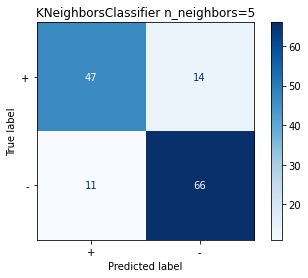

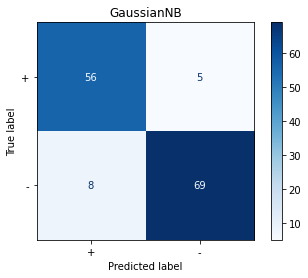

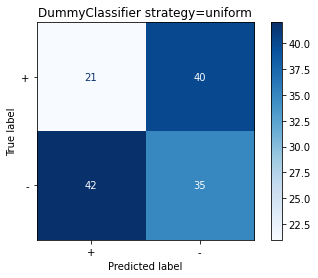

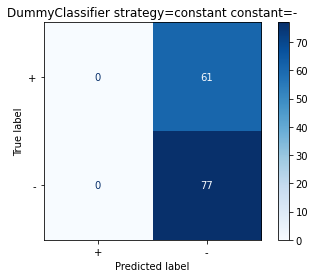

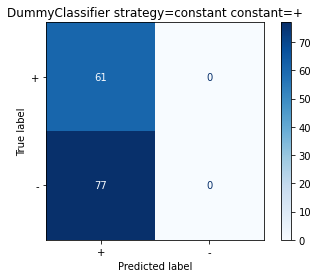

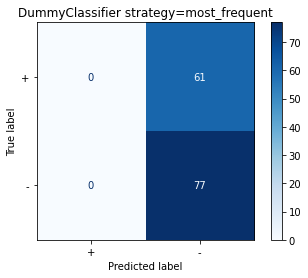

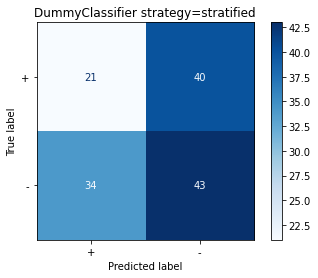

In [30]:
#For all classifiers plot the cnf matrix
clfs = [pipe_knn, pipe_gnb] + (pipes_dc)
preds =[pred_pipe_knn, pred_pipe_gnb] + (pred_pipes_dc) 
plot_cnf_clfs(clfs, preds, y_test,["+", "-"])

#####**Χρόνοι εκτέλεσης**

Ακολουθούν οι χρόνοι που χρειάστηκαν για την εκπαίδευση και εκτίμηση του κάθε ταξινομητή.



In [31]:
#Create a list with the times for fit and predict
times = [time_pipe_knn] + [time_pipe_gnb] + time_pipes_dc

#Creating the names of the classifiers so we can have a nice format.
names = []
for clf in clfs:
  clf_name = str(clf).split("(")[0]
  if (clf_name == "DummyClassifier"):
    clf_name = clf_name + " strategy=" + str(clf.strategy)
    if (clf.constant):
      clf_name = clf_name + " constant=" + str(clf.constant)
  elif (clf_name == "GaussianNB"):
    clf_name = clf_name
  elif (clf_name == "MLPClassifier"):
    clf_name = clf_name    
  elif (clf_name == "KNeighborsClassifier"):
    clf_name = clf_name + " n_neighbors=" + (str(clf.n_neighbors))
  elif (clf_name == "LinearSVC"):
    clf_name = "Linear SVM"
  elif (clf_name == "SVC"):
    clf_name = (str(clf.kernel)) + " SVM"
  elif (clf_name == "SVC"):
    clf_name = (str(clf.kernel)) + " SVM"
  names.append(clf_name)

In [32]:
pd.DataFrame({'Time (s)': times}, index=names)


,Time (s)
Pipeline,53.259962
Pipeline,3.597753
Pipeline,4.833031
Pipeline,4.867292
Pipeline,4.680594
Pipeline,4.694143
Pipeline,4.819586


#####**Bar Plots για f1 scores**

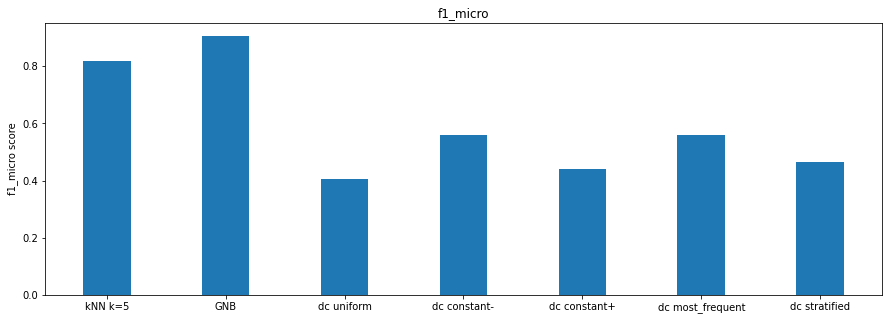

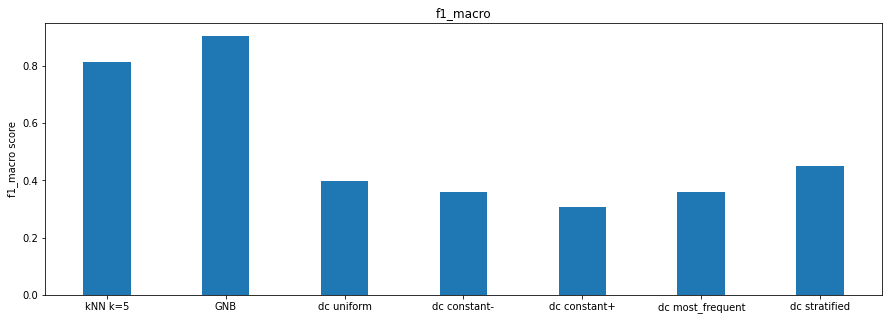

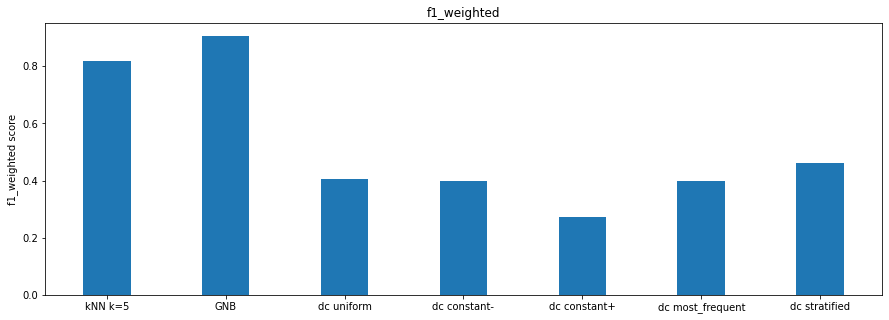

In [33]:
barplot_clfs(clfs,preds,y_test)

#####**Πίνακας μεταβολής απόδοσης**

Ο παρακάτω πίνακας μας δείχνει την μεταβολή της απόδοσης στο test set (μετρικές f1_micro και f1_macro) πριν και μετά την βελτιστοποίηση των ταξινομητών.



In [34]:
changes = {
    'Before F1 (micro)':  [precision_recall_fscore_support(y_test, pred_knn, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_gnb, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_uni, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_const_minus, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_const_plus, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_freq, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_strat, average='micro')[2]],
    'After F1 (micro)':   [precision_recall_fscore_support(y_test, pred_pipe_knn, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_pipe_gnb, average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[0], average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[1], average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[2], average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[3], average='micro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[4], average='micro')[2]],
    'Before F1 (macro)':  [precision_recall_fscore_support(y_test, pred_knn, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_gnb, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_uni, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_const_minus, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_const_plus, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_freq, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_strat, average='macro')[2]],
    'After F1 (macro)':   [precision_recall_fscore_support(y_test, pred_pipe_knn, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_pipe_gnb, average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[0], average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[1], average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[2], average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[3], average='macro')[2],
                          precision_recall_fscore_support(y_test, pred_pipes_dc[4], average='macro')[2]],
}
pd.DataFrame(changes, index=names)

,Before F1 (micro),After F1 (micro),Before F1 (macro),After F1 (macro)
Pipeline,0.739130,0.818841,0.729530,0.815340
Pipeline,0.855072,0.905797,0.851293,0.904954
Pipeline,0.449275,0.405797,0.443548,0.399618
Pipeline,0.557971,0.557971,0.358140,0.358140
Pipeline,0.442029,0.442029,0.306533,0.306533
Pipeline,0.557971,0.557971,0.358140,0.358140
Pipeline,0.420290,0.463768,0.412391,0.449784


#####**Σχολιασμός Αποτελεσμάτων**

Εκτός των σχολίων που δώθηκαν ενδιάμεσα των βημάτων, υπογραμμίζουμε τα εξής:

1)Ο ταξινομητής που παρουσίασε την μεγαλύτερη βελτίωση απόδοσης καθώς και την μεγαλύτερη απόδοση στο training set ήταν ο kNN ώστοσο η απόδοση του στο test set ηταν χαμηλοτερή σε σχεση με αυτή του training set.

2)O GNB είχε μία μικρή αύξηση απόδοσης στο training set και πήραμε από αυτόν την μεγαλύτερη απόδοση στο test set.

3)O kNN πήρε την περισσότερη ώρα για fit και predict με gridsearch το οποίο όμως είναι λογικό αφού είχαμε 3 υπερπαραμέτρους προς βελτιστοποίηση σε σχέση με τους υπόλοιπους ταξινομητές που είχαμε 2. 

4)Οι dummy classifiers δεν ανταποκρίθηκαν στην βελτιστοποίηση που προσπαθήσαμε να τους κάνουμε και έιχαν χαμηλή απόδοση όπως οι αρχικοί.

###**Μεγάλο Dataset (B11)**

####**Βασικές Πληροφορίες**

**Εισαγωγή του dataset**

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Nomao.data", header=None)
#Show the first 5 samples of the dataframe
df.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0#1,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,...,s,1,1,1,1,1,1,s,s,?,?,?,m,?,?,?,m,1.0,1.0,1.0,s,1,1,1,s,1,1,1,s,0.999967001089,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1,0.999999996702,1
1,0#2,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,...,s,1,1,1,1,1,1,s,s,?,?,?,m,?,?,?,m,1.0,1.0,1.0,s,1,1,1,s,1,1,1,s,0.999807037242,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1,0.999999962459,1
2,0#3,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,...,s,1,1,1,1,1,1,s,s,?,?,?,m,?,?,?,m,1.0,1.0,1.0,s,1,1,1,s,1,1,1,s,0.999982900292,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1,0.999999999653,1
3,4#5,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,1,1,1,1,1,1,s,s,1,1,1,1,1,1,s,s,1,1,1,1,1,1,s,s,?,?,?,?,?,?,m,...,s,1,1,1,1,1,1,s,s,1.46868813298e-09,0.272727272727,0.0909090936184,n,?,?,?,m,1.0,1.0,1.0,s,0.999774,0.555556,0.333333,n,0.999962,0.5,0.294118,n,0.998022916602,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,1,0.999994124065,1
4,6#7,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,m,?,?,?,?,?,?,m,...,s,1,1,1,1,1,1,s,s,1.0,1.0,1.0,s,?,?,?,m,?,?,?,n,1,1,1,s,1,1,1,s,?,?,?,m,?,?,?,m,1,?,1


**Παρουσίαση του dataset**

To Nomao dataset (B11) συλλέγει δεδομένα από διάφορες πηγές στο διαδίκτυο σχετικά με τοποθεσίες. Συγκεκριμένα κάθε γραμμή του αρχείου αποτελεί σύγκριση δύο τοποθεσιών (ορισμένες από τα χαρακτηριστικά τους, όπως όνομα, διεύθυνση, γεωγραφική τοποθεσία). Πέραν από την περιγραφή κάθε τοποθεσίας, περιέχεται και πεδίο ετικέτας το οποίο καθορίζει εάν οι δύο τοποθεσίες είναι οι ίδιες ή όχι.

Στόχος μας είναι με επιβλεπόμενη μάθηση να εκπαιδεύσουμε μοντέλο το οποίο να μπορεί με υψηλή απόδοση να αποφασίσει εάν δύο δοθούντες τοποθεσίες (ή πιο συγκεκριμένα, εάν δοθεί η σύγκρισή τους) είναι ίδιες ή οχι.

**Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Μη διατεταγμένα χαρακτηριστικά**

Το dataset περιέχει 34,465 δείγματα. Kάθε δείγμα αποτελείται από 118 χαρακτηριστικά τα οποία είναι κατηγορικά ή αριθμητικά. Τα διατεταγμένα χαρακτηριστικά είναι μόνο τα αριθμητικά. Ακόμα κάθε δείγμα περιέχει μία ετικέτα που μας δείχνει αν τελικά τα χαρακτηριστικά περιγράφουν την ίδια τοποθεσία και ένα id που αποτελείται από δύο αριθμόυς χωρισμένους με # και μας δείχνουν για ποιες τοποθεσίες μιλάνε τα χαρακτηριστικά. Πιο συγκεκριμένα κάθε δείγμα έχει 89 αριθμήτικά χαρακτηριστικά και 31 κατηγορικά μαζί με το id και την ετικέτα.

**Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**

Όχι, τα δεδομένα μας βρίσκονται σε raw μορφή μέσα στο αρχείο και επομένως δεν έχουν ούτε επικεφαλίδες ούτε αρίθμηση γραμμών.

**Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**

Οι ετικέτες των κλάσεων βρίσκονται στην 119η κολόνα και είναι είτε "+1" δηλαδή ταύτιση των 2 τοποθεσιών είτε "-1" δηλαδή οι τοποθεσίες είναι διαφορετικές.

In [36]:
unique_labels = df.iloc[:,-1].unique()
print("Unique labels of samples: {0}".format(unique_labels))

Unique labels of samples: [ 1 -1]


**Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες;**

Όχι, δεν χρειάστηκε να γίνει κάποια μετατροπή στα αρχεία text. Mόνο αφαιρέσαμε την στήλη id από το dataset καθώς δεν έχει κάποια πρακτική σημασία για τους ταξινομητές μας όπως τα υπόλοιπα δεδομένα και αν την αφήσουμε μέσα στο dataset τότε θα θεωρηθεί ως κατηγορικό χαρακτηριστικό το οποίο οδηγεί σε λάθος.

In [37]:
df.drop(columns=0, inplace=True)

**Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Παρατηρούμε ότι οι απουσιάζουσες τιμές εμφανίζονται με "?" μέσα στο αρχείο εισόδου και δεν υπάρχει καμία απουσιάζουσα ετικέτα.

In [38]:
df.replace('?', np.NaN, inplace=True) # replace all ? with np.NaN

In [39]:
df.isnull().sum().sum() # how many missing values we have

1166378

In [40]:
sum([True for idx,row in df.iterrows() if any(row.isnull())]) # how many samples have missing values

34465

Επομένως υπάρχουν συνολικά 1166378 απουσιάζουσες τιμές σε 34465 εκ των δειγμάτων, που αντιστοιχούν στο 100% του συνόλου. Με άλλα λόγια κάθε δείγμα στο dataset μας έχει τουλάχιστον μία απουσιάζουσα τιμή.

**Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Εκτιμήστε την ισορροπία του dataset.**

In [41]:
labels_df = df.iloc[:,-1] # labels in the last column
features_df = df.iloc[:,:-1] # features in all columns but the last

mapping = {-1 : 0, 1 : 1} # mapping for labels
labels_df = labels_df.replace(mapping)

np_labels = labels_df.values.flatten() # convert labels dataframe to numpy array
frequencies = np.bincount(np_labels)
total_samples = np_labels.shape[0]
percentages = (frequencies / total_samples) * 100

print("Class frequencies: {0}".format(frequencies))

print("Class percentages: {0}".format(percentages))

Class frequencies: [ 9844 24621]
Class percentages: [28.56230959 71.43769041]


Το σύνολο δεδομένων έχει μόνο δύο κλάσεις, οι οποίες έχουν τα παραπάνω ποσοστά εμφάνισης. Βλέπουμε ότι τα ποσοστά αυτά βρίσκονται κοντά σε αναλογία 70%-30%, επομένως (θεωρώντας μη ισορροπημένο ένα dataset στο οποίο υπάρχει κλάση με μέγεθος τουλάχιστον 1.5 φορές κάποιας άλλης) το dataset είναι μη ισορροπημένο.

**Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**

Αφού χωρίσουμε το dataset σε train και test set θα αντικαταστήσουμε τις απουσιάζουσες τιμές καθώς η είσοδος στους αλγορίθμους μηχανικής μάθησης πρέπει να είναι πλήρης. Για το λόγο αυτόν, θα χρησιμοποιήσουμε το μετασχηματιστή “Imputer” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές). Ο μετασχηματισμός με Imputer γίνεται στην απόλυτη αρχή της προεπεξεργασίας. Ακόμα στο train_test_split ενεργοποιήσαμε την επιλογή stratify ώστε να έχουμε το train set να διατηρεί τις συχνότητες κλάσεων του συνολικού. 

In [42]:
#Split our dataframe intο train and test set
trainData, testData, trainLabels, testLabels = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3,stratify=df.iloc[:,-1], random_state=42)

categorical_indexes = [7, 8, 15, 16, 23, 24, 31, 32, 39, 40, 47, 48, 55, 56, 63, 64, 71, 72, 79, 80, 87, 88, 92, 96, 100, 104, 108, 112, 116] 
continuous_indexes = list(set (df.columns) - set (categorical_indexes) - {119})

#Split dataframes into categorical and continuous features dataframes
trainData_continuous = trainData.drop(categorical_indexes, axis=1)
trainData_categorical = trainData.drop(continuous_indexes, axis=1)
testData_continuous = testData.drop(categorical_indexes, axis=1)
testData_categorical = testData.drop(continuous_indexes, axis=1)

#Impute the missing values on continuous features
imp = SimpleImputer(missing_values=np.NaN,strategy='mean')
itrainData_continuous = pd.DataFrame(imp.fit_transform(trainData_continuous))
itrainData_continuous.columns=continuous_indexes
itestData_continuous = pd.DataFrame(imp.fit_transform(testData_continuous))
itestData_continuous.columns=continuous_indexes

#Impute the missing values on categorical features
imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
itrainData_categorical = pd.DataFrame(imp.fit_transform(trainData_categorical))
itrainData_categorical.columns=categorical_indexes
itestData_categorical = pd.DataFrame(imp.fit_transform(testData_categorical))
itestData_categorical.columns=categorical_indexes

#Merge dataframes and reorder indexes to form the original ones imputed
itrainData = pd.concat([itrainData_categorical, itrainData_continuous], axis=1)
itrainData = itrainData.reindex(sorted(itrainData.columns), axis=1)
itestData = pd.concat([itestData_categorical, itestData_continuous], axis=1)
itestData = itestData.reindex(sorted(itestData.columns), axis=1)

#Convert categorical features to binary , we have to join the two data before this step
Data_dummies = pd.get_dummies(pd.concat([itrainData,itestData], join="outer", axis=0),columns=categorical_indexes)
trainData_dummies = Data_dummies.iloc[:itrainData.shape[0],:]
testData_dummies = Data_dummies.iloc[itrainData.shape[0]:,:]

#Convert to numeric values and numpy arrays
np_trainData = trainData_dummies.apply(pd.to_numeric).values
np_testData = testData_dummies.apply(pd.to_numeric).values
np_trainLabels = trainLabels.values.flatten()
np_testLabels =  testLabels.values.flatten()

#Giving symbolic ml names to our arrays 
X_train = np_trainData
y_train = np_trainLabels
X_test =  np_testData
y_test =  np_testLabels

####**Baseline classification**



Αρχικά υλοποιήσαμε τους ταξινομητές που ζητούνται χωρίς καμία βελτιστοποίηση στο κόμματι του preproccesing ή των υπερπαραμέτρων του ταξινομητή.

Για κάθε ταξινομητή που ζητείται υπολογίσαμε τις μετρικές f1_micro avg και f1_macro avg καθώς και τους πίνακες σύγχυσης για την εκτίμηση του στο test set.Ακόμα για τους ταξινομητές kNN, GNB, MLP, SVM υπολογίζουμε και την μετρική f1_macro avg με χρηση 5-fold cross validation στο training set ώστε να συγκρίνουμε την απόδοση της βελτιστοποίησης που θα γίνει σε επόμενο βήμα.

Για την εμφάνιση των μετρικών χρησιμοποιήσαμε την συνάρτηση `classification_report` του sklearn η οποία εμφανίζει τις μετρικές precision, recall, f1, support για micro avg, macro avg, weighted avg συνολικά καθώς και για κάθε κλάση ξεχωριστά, υπογραμμίζουμε οτι το micro avg εμφανίζεται ως accuracy.

Τέλος παρατηρήσαμε πως το sklearn χρησιμοποιεί StratifiedKFold ως default επιλογή στα binary classification.


#####**Dummy Classifiers**

In [43]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_minus1 = DummyClassifier(strategy="constant", constant=-1)
dc_constant_plus1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")


dc_preds = [[],[],[],[],[]]
strat_msg = ["uniform", "constant minus 1", "constant plus 1", "most frequent", "stratified"]
for i, clf in zip(range(5), [dc_uniform, dc_constant_minus1, dc_constant_plus1,\
                             dc_most_frequent, dc_stratified]):
  
  clf.fit(X_train, y_train)
  dc_preds[i] = clf.predict(X_test)
  print("The DummyClassifier with " + strat_msg[i] + " strategy has scores on test set : \n" +\
      classification_report(y_test,dc_preds[i]))

The DummyClassifier with uniform strategy has scores on test set : 
              precision    recall  f1-score   support

          -1       0.28      0.49      0.36      2953
           1       0.71      0.50      0.59      7387

    accuracy                           0.50     10340
   macro avg       0.50      0.49      0.47     10340
weighted avg       0.59      0.50      0.52     10340

The DummyClassifier with constant minus 1 strategy has scores on test set : 
              precision    recall  f1-score   support

          -1       0.29      1.00      0.44      2953
           1       0.00      0.00      0.00      7387

    accuracy                           0.29     10340
   macro avg       0.14      0.50      0.22     10340
weighted avg       0.08      0.29      0.13     10340

The DummyClassifier with constant plus 1 strategy has scores on test set : 
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      2953
           1    

#####**Gausian Naive Bayes**

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
f1_micro_score_gnb = cross_val_score(gnb, X_train, y_train, cv=5, scoring='f1_micro')
f1_macro_score_gnb = cross_val_score(gnb, X_train, y_train, cv=5, scoring='f1_macro')

pred_gnb = gnb.predict(X_test)

print("The GaussianNB Classifier has f1_macro score on training set : %f \n" % (f1_micro_score_gnb.mean()))
print("The GaussianNB Classifier has f1_macro score on training set : %f \n" % (f1_macro_score_gnb.mean()))
print("The GaussianNB Classifier has scores on test set : \n" + classification_report(y_test,pred_gnb))

The GaussianNB Classifier has f1_macro score on training set : 0.828560 

The GaussianNB Classifier has f1_macro score on training set : 0.769438 

The GaussianNB Classifier has scores on test set : 
              precision    recall  f1-score   support

          -1       0.73      0.55      0.63      2953
           1       0.84      0.92      0.88      7387

    accuracy                           0.81     10340
   macro avg       0.78      0.73      0.75     10340
weighted avg       0.81      0.81      0.80     10340



#####**k Nearest Neighbors Classifier (kNN) με k=5**

In [45]:
# kNN Classifier, default k=5
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
f1_micro_score_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring="f1_micro")
f1_macro_score_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring="f1_macro")

pred_knn = knn.predict(X_test)

print("The KNeighborsClassifier with k=" + str(knn.n_neighbors) + " has f1_micro score on training set : %f \n" % (f1_micro_score_knn.mean()))
print("The KNeighborsClassifier with k=" + str(knn.n_neighbors) + " has f1_macro score on training set : %f \n" % (f1_macro_score_knn.mean()))
print("The KNeighborsClassifier with k=" + str(knn.n_neighbors) + " has scores on test set : \n" + classification_report(y_test,pred_knn))

The KNeighborsClassifier with k=5 has f1_micro score on training set : 0.948187 

The KNeighborsClassifier with k=5 has f1_macro score on training set : 0.936586 

The KNeighborsClassifier with k=5 has scores on test set : 
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92      2953
           1       0.97      0.97      0.97      7387

    accuracy                           0.95     10340
   macro avg       0.94      0.94      0.94     10340
weighted avg       0.95      0.95      0.95     10340



#####**Multi-Layer Percepton (MLP)**

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
f1_micro_score_mlp = cross_val_score(mlp, X_train, y_train, cv=5, scoring="f1_micro")
f1_macro_score_mlp = cross_val_score(mlp, X_train, y_train, cv=5, scoring="f1_macro")

pred_mlp = mlp.predict(X_test)

print("The MLPClassifier has f1_micro score on training set : %f \n" % (f1_micro_score_mlp.mean()))
print("The MLPClassifier has f1_macro score on training set : %f \n" % (f1_macro_score_mlp.mean()))
print("The MLPClassifier has scores on test set : \n" + classification_report(y_test,pred_mlp))

The MLPClassifier has f1_micro score on training set : 0.960456 

The MLPClassifier has f1_macro score on training set : 0.947356 

The MLPClassifier has scores on test set : 
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92      2953
           1       0.96      0.98      0.97      7387

    accuracy                           0.96     10340
   macro avg       0.96      0.94      0.95     10340
weighted avg       0.96      0.96      0.96     10340



#####**Support Vector Machines (SVM)**

Για τον SVM ταξινομητή, θα χρησιμοποιήσουμε γραμμικό πυρήνα καθώς και τους πυρήνες poly και rbf.



In [47]:
from sklearn.svm import LinearSVC, SVC

lin = LinearSVC()
poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf')

svm_preds = [[],[],[]]
for i, clf in zip(range(3), [lin, poly, rbf]):
  svm_kernel = "linear" if i == 0 else clf.kernel

  clf.fit(X_train, y_train)
  svm_preds[i] = clf.predict(X_test)
  f1_micro_score_svm = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1_micro")
  f1_macro_score_svm = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1_macro")

  print("The SVM classifier with " + svm_kernel + " kernel has f1_micro score on training set : %f \n"\
        % (f1_micro_score_svm.mean()))
  print("The SVM classifier with " + svm_kernel + " kernel has f1_macro score on training set : %f \n"\
        % (f1_macro_score_svm.mean()))
  print("The SVM classifier with " + svm_kernel + " kernel has scores on test set : \n"\
        + classification_report(y_test,svm_preds[i]))

The SVM classifier with linear kernel has f1_micro score on training set : 0.948725 

The SVM classifier with linear kernel has f1_macro score on training set : 0.937086 

The SVM classifier with linear kernel has scores on test set : 
              precision    recall  f1-score   support

          -1       0.92      0.89      0.90      2953
           1       0.96      0.97      0.96      7387

    accuracy                           0.95     10340
   macro avg       0.94      0.93      0.93     10340
weighted avg       0.95      0.95      0.95     10340

The SVM classifier with poly kernel has f1_micro score on training set : 0.959959 

The SVM classifier with poly kernel has f1_macro score on training set : 0.950943 

The SVM classifier with poly kernel has scores on test set : 
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93      2953
           1       0.97      0.97      0.97      7387

    accuracy                           0.96

#####**Confusion Matrices - Πίνακες Σύγχυσης**

H ίδια συνάρτηση `plot_cnf_clfs` χρησιμοποιείται και πάλι για να σχεδιάσει τα confusion matrices για τα εν λόγω αποτελέσματα.

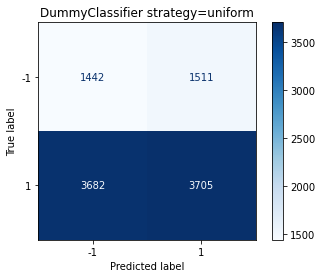

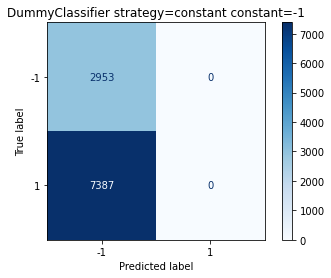

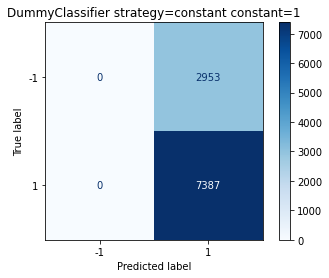

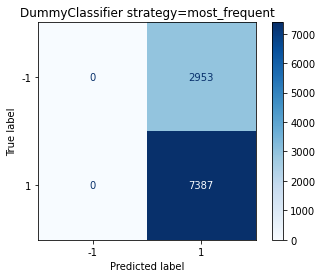

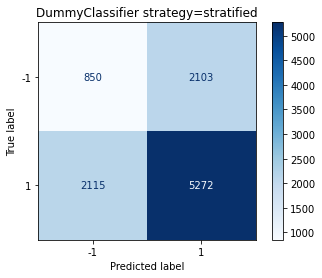

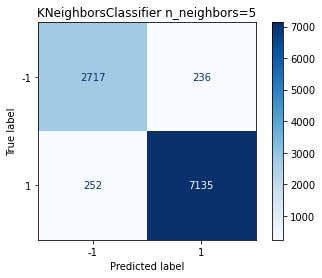

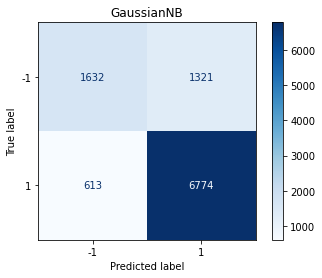

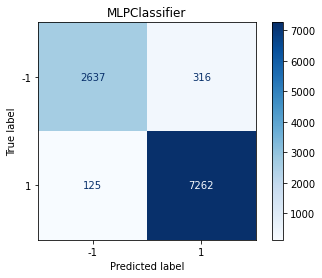

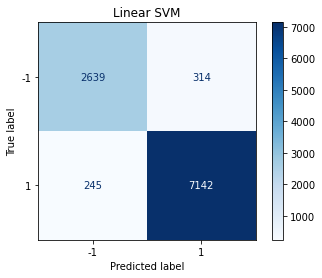

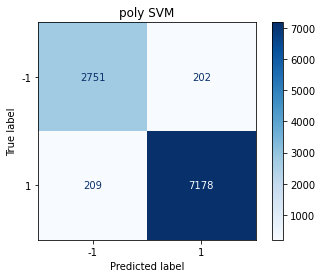

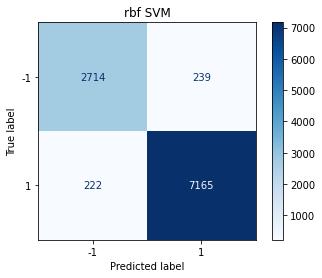

In [48]:
#For all classifiers plot the cnf matrix
clfs = [ dc_uniform, dc_constant_minus1, dc_constant_plus1, dc_most_frequent, dc_stratified, knn, gnb, mlp,
        lin, poly, rbf ]
preds = dc_preds + [pred_knn, pred_gnb, pred_mlp] + svm_preds
plot_cnf_clfs(clfs, preds, y_test,[-1, 1])

#####**Bar Plots για f1 scores**

Η συνάρτηση `barplot_clfs` δέχεται ως ορίσματα τους ταξινομητές μαζί με τα predictions που έγιναν για το test set και με την βοηθεια της matplotlib σχεδιάζει τα bar plot των μετρικών f1_micro avg και f1_macro avg για κάθε ταξινομητη.

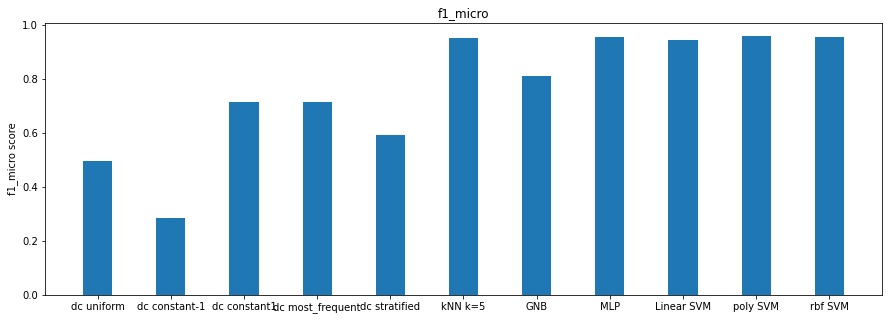

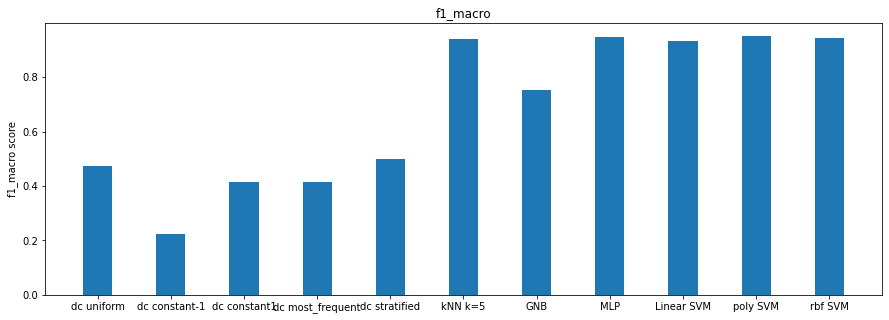

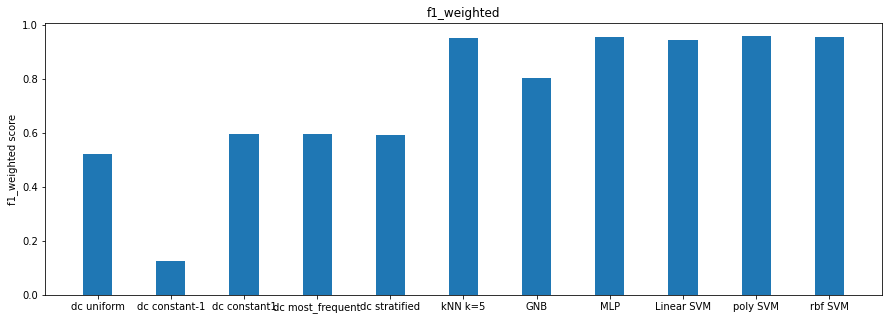

In [49]:
barplot_clfs(clfs,preds,y_test)

####**Βελτιστοποίηση ταξινομητών**

Για κάθε ταξινομητή (εκτός των dummy) προσπαθούμε να βελτιώσουμε την απόδοση του στο training set με κάποιον συνδυασμό των VarianceThreshold, RandomOverSampler και PCA. Ως κριτήριο βελτιστοποίησης θα χρησιμοποιήσουμε την μετρική f1_macro και την f1_micro. Εκ των δύο μόντελων θα επιλεχθεί αυτό με την καλύτερη απόδοση στο test set.

Λόγω του μεγάλου χρόνου που κάποιοι ταξινομητές χρειάζονται για την αναζήτηση πλέγματος (με μεγάλο εύρος υπερπαραμέτρων), στη συνέχεια θα χρησιμοποιηθεί κατά τη διάρκεια του progressive grid search ένα μικρότερο μέρος του συνόλου εκπαίδευσης (συγκεκριμένα επιλέχτηκε το 5%), με μόνο την τελική στενότερη αναζήτηση να εφαρμόζεται στο πλήρες σύνολο.

In [50]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
ros = RandomOverSampler()
rus = RandomUnderSampler()
mscaler = MinMaxScaler()
sscaler = StandardScaler()
pca = PCA()

In [51]:
joined_train = np.concatenate((X_train, np.array([y_train]).T), axis=1)
X_sample, _, y_sample, _ = train_test_split(joined_train[:,:174], joined_train[:,174],
                                            test_size=0.95, stratify=joined_train[:, -1])

#####**Gaussian Naives Bayes**

In [52]:
pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', sscaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])

Στο στάδιο, αυτό εξετάζουμε τα αποτελέσματα της προεπεξεργασίας με default υπερπαραμέτρους,δηλαδή προτού εφαρμόσουμε grid search/cross-validation, ώστε να επιλέξουμε τις βέλτιστες υπερπαραμέτρους.

In [53]:
pipe_gnb.fit(X_train, y_train)
pred_pipe_gnb = pipe_gnb.predict(X_test)
score_micro_pipe_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=5, scoring='f1_micro')
score_macro_pipe_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=5, scoring='f1_macro')

print("The GaussianNB Classifier with default preprocessing has f1_micro score on training set : %f \n"\
      % (score_micro_pipe_gnb.mean()))
print("The GaussianNB Classifier with default preprocessing has f1_macro score on training set : %f \n"\
      % (score_macro_pipe_gnb.mean()))
print("The GaussianNB Classifier with default preprocessing parameters has scores on test set : \n"\
      + classification_report(y_test,pred_pipe_gnb))

The GaussianNB Classifier with default preprocessing has f1_micro score on training set : 0.596104 

The GaussianNB Classifier with default preprocessing has f1_macro score on training set : 0.612465 

The GaussianNB Classifier with default preprocessing parameters has scores on test set : 
              precision    recall  f1-score   support

          -1       0.71      0.72      0.72      2953
           1       0.89      0.88      0.89      7387

    accuracy                           0.84     10340
   macro avg       0.80      0.80      0.80     10340
weighted avg       0.84      0.84      0.84     10340



Οι παρακάτω τιμές προέκυψαν από προηγούμενο gridsearch με τιμές

vthreshold = []

n_components= []

In [54]:
#Grid Search Cross Validation με επιλεγμένο τον StandardScaler
vthreshold = [0.08, 0.088, 0.09, 0.095, 1e-1]
n_components = [1, 18, 20, 23, 25]

estimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro',n_jobs=-1)
start_time = time.time()
estimator.fit(X_train, y_train)
estimator_pred = estimator.predict(X_test)
estimator_time = time.time() - start_time

print("The GaussianNB Classifier has f1_micro score on training set : %f \n" % (estimator.best_score_))
print("The GaussianNB Classifier optimized by f1_micro : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

pipe_gnb = estimator.best_estimator_
pred_pipe_gnb = estimator_pred
time_pipe_gnb = estimator_time

print("\n")

estimator = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro',n_jobs=-1)
estimator.fit(X_train, y_train)
estimator_pred = estimator.predict(X_test)

print("The GaussianNB Classifier has f1_macro score on training set : %f \n" % (estimator.best_score_))
print("The GaussianNB Classifier optimized by f1_macro : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

The GaussianNB Classifier has f1_micro score on training set : 0.908560 

The GaussianNB Classifier optimized by f1_micro : 
              precision    recall  f1-score   support

          -1       0.80      0.91      0.85      2953
           1       0.96      0.91      0.93      7387

    accuracy                           0.91     10340
   macro avg       0.88      0.91      0.89     10340
weighted avg       0.91      0.91      0.91     10340

with best parameters
{'pca__n_components': 18, 'selector__threshold': 0.09}


The GaussianNB Classifier has f1_macro score on training set : 0.893436 

The GaussianNB Classifier optimized by f1_macro : 
              precision    recall  f1-score   support

          -1       0.79      0.92      0.85      2953
           1       0.97      0.90      0.93      7387

    accuracy                           0.91     10340
   macro avg       0.88      0.91      0.89     10340
weighted avg       0.91      0.91      0.91     10340

with best paramete

#####**k Nearest Neighbors Classifier (kNN)**

In [55]:
from sklearn.model_selection import GridSearchCV

pipe_knn = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('knn', knn)],memory="tmp")

Τώρα θα δούμε τις τιμές του variance ώστε να ορίσουμε κάταλληλο διάστημα για το VarianceThreshold.

In [56]:
train_variance = X_train.var(axis=0)
train_variance.sort()
print(train_variance)
print(np.max(train_variance))

[2.07209198e-04 2.07209198e-04 2.07209198e-04 2.07209198e-04
 2.07209198e-04 2.07209198e-04 2.07210932e-04 2.07210932e-04
 2.07210932e-04 2.07210932e-04 2.90071250e-04 2.90071250e-04
 1.36600456e-03 1.36600456e-03 2.06779663e-03 3.13014069e-03
 3.29803320e-03 3.36538681e-03 3.86245774e-03 4.35659552e-03
 4.39773369e-03 5.03748690e-03 5.19327881e-03 5.29984133e-03
 5.86829226e-03 6.31695938e-03 7.18598212e-03 7.41614660e-03
 7.98216646e-03 1.19660600e-02 1.21593230e-02 1.22002840e-02
 1.30883084e-02 1.53425847e-02 1.53425847e-02 1.53713488e-02
 1.69036134e-02 1.69854920e-02 1.74547673e-02 1.83713487e-02
 1.91561518e-02 1.94031469e-02 1.94176234e-02 2.29586745e-02
 2.43897403e-02 2.49210423e-02 2.60209509e-02 2.63233970e-02
 2.65307070e-02 2.71373442e-02 2.77340631e-02 2.81839248e-02
 2.81980886e-02 2.85625855e-02 2.90812282e-02 2.98922120e-02
 3.00049780e-02 3.11905464e-02 3.15271025e-02 3.15575823e-02
 3.31719163e-02 3.31719163e-02 3.36439390e-02 3.40443743e-02
 3.54918375e-02 3.729264

Όπως πριν θα εξέτασουμε τα αποτελέσματα της προεπεξεργασίας προτού γίνει αναζήτηση βέλτιστων υπερπαραμέτρων.

In [57]:
pipe_knn.fit(X_train,y_train)
pred_pipe_knn = pipe_knn.predict(X_test)
f1_macro_score_pipe_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='f1_macro')
f1_micro_score_pipe_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='f1_micro')

print("The KNeighborsClassifier with k=" + str(pipe_knn[-1].n_neighbors) + " and default preprocessing parameters has f1_macro score on training set : %f \n" % (f1_macro_score_pipe_knn.mean()))
print("The KNeighborsClassifier with k=" + str(pipe_knn[-1].n_neighbors) + " and default preprocessing parameters has f1_micro score on training set : %f \n" % (f1_micro_score_pipe_knn.mean()))
print("The KNeighborsClassifier with k=" + str(pipe_knn[-1].n_neighbors) + " and default preprocessing parameters has scores on test set : \n" + classification_report(y_test,pred_pipe_knn))

The KNeighborsClassifier with k=5 and default preprocessing parameters has f1_macro score on training set : 0.925197 

The KNeighborsClassifier with k=5 and default preprocessing parameters has f1_micro score on training set : 0.936912 

The KNeighborsClassifier with k=5 and default preprocessing parameters has scores on test set : 
              precision    recall  f1-score   support

          -1       0.86      0.95      0.90      2953
           1       0.98      0.94      0.96      7387

    accuracy                           0.94     10340
   macro avg       0.92      0.94      0.93     10340
weighted avg       0.95      0.94      0.94     10340



Έπειτα θα εφαρμόσουμε progressive αναζήτηση πλέγματος ώστε να βελτιστοποιήσουμε τον ταξινομητή επιλέγοντας τις βέλτιστες υπερπαραμέτρους για την προεπεξεργασία και την υπερπαράμετρο k,weights και metric του kNN.Το παρακάτω gridsearch αποτελει το τελικό της progressive αναζήτησης, προηγουμένως πραγματοποιήσαμε gridsearch για μεγαλύτερα διαστήματων των υπερπαραμέτρων ως εξής:

vthreshold = [0, 2e-02, 4.5e-02, 7e-02, 2e-01, 3e-1]                     
n_components = [10, 40, 70, 100, 130]                                    
k = [1, 5, 11, 15, 21, 25, 31, 35, 41]                                   
weights = ['distance', 'uniform']                                        
metric = ['euclidean', 'manhattan', 'minkowski']


In [58]:
#Grid for knn classifier

vthreshold = [0, 2e-02, 4.5e-02, 7e-02, 2e-01, 2.4e-01]
n_components = [10, 40, 70, 100, 130]
k = [1, 5, 11, 15, 21, 25, 31, 35, 41] 
weights = ['distance', 'uniform']
metric = ['euclidean', 'manhattan', 'minkowski']

estimator = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k, knn__weights=weights, knn__metric=metric),\
                         cv=5, scoring='f1_macro', n_jobs=-1)
estimator.fit(X_sample,y_sample)
estimator_pred = estimator.predict(X_test)
print("The KNeighborsClassifier optimized by f1_macro has f1_macro score on training set %f : \n" % (estimator.best_score_))
print("The KNeighborsClassifier optimized by f1_macro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

pipe_knn = estimator.best_estimator_
pred_pipe_knn = estimator_pred
time_pipe_knn = estimator_time

print("\n")

estimator = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k, knn__weights=weights, knn__metric=metric),\
                         cv=5, scoring='f1_micro', n_jobs=-1)
estimator.fit(X_sample,y_sample)
estimator_pred = estimator.predict(X_test)
print("The KNeighborsClassifier optimized by f1_micro has f1_micro score on training set %f : \n" % (estimator.best_score_))
print("The KNeighborsClassifier optimized by f1_micro has scores on test set : \n" + classification_report(y_test,estimator_pred))
print("with best parameters")
print(estimator.best_params_)

The KNeighborsClassifier optimized by f1_macro has f1_macro score on training set 0.892199 : 

The KNeighborsClassifier optimized by f1_macro has scores on test set : 
              precision    recall  f1-score   support

          -1       0.83      0.86      0.85      2953
           1       0.94      0.93      0.94      7387

    accuracy                           0.91     10340
   macro avg       0.89      0.90      0.89     10340
weighted avg       0.91      0.91      0.91     10340

with best parameters
{'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0}


The KNeighborsClassifier optimized by f1_micro has f1_micro score on training set 0.911275 : 

The KNeighborsClassifier optimized by f1_micro has scores on test set : 
              precision    recall  f1-score   support

          -1       0.83      0.86      0.85      2953
           1       0.94      0.93      0.94      7387

    accuracy       

#####**Multi-Layer Perceptron (MLP)**

In [59]:
pipe_mlp = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)])

[Ellipsis]

In [ ]:
pipe_mlp.fit(X_train, y_train)
pred_pipe_mlp = pipe_mlp.predict(X_test)
f1_micro_score_pipe_mlp = cross_val_score(pipe_mlp, X_train, y_train, cv = 5, scoring = 'f1_micro')
f1_macro_score_pipe_mlp = cross_val_score(pipe_mlp, X_train, y_train, cv = 5, scoring = 'f1_macro')

print("The Multilayer perceptron Classifier with default preprocessing has f1_micro score on training set : %f \n" % (f1_micro_score_pipe_mlp.mean()))
print("The Multilayer perceptron Classifier with default preprocessing has f1_macro score on training set : %f \n" % (f1_macro_score_pipe_mlp.mean()))
print("The Multilayer perceptron Classifier with default preprocessing parameters has scores on test set: \n" + classification_report(y_test,pred_pipe_mlp))

#####**Support Vector Machines (SVM)** 

Για τους SVM ταξινομητές μετά από δοκιμές επιλέχτηκε ως βέλτιστη η ίδια διοχέτευση: Minmax Scaler, Variance Threshold Selection, Random Oversampling, PCA και τέλος ο ίδιος ο ταξινομητής.

In [60]:
pipe_lin = Pipeline(steps=[('scaler', mscaler), ('selector', selector), ('ros', ros), ('pca', pca)\
                               , ('svm', lin)], memory = 'tmp')
pipe_poly = Pipeline(steps=[('scaler', mscaler), ('selector', selector), ('ros', ros), ('pca', pca),\
                            ('svm', poly)], memory = 'tmp')
pipe_rbf = Pipeline(steps=[('scaler', mscaler), ('selector', selector), ('ros', ros), ('pca', pca)\
                               , ('svm', rbf)], memory = 'tmp')

pipes_svm = [pipe_lin, pipe_poly, pipe_rbf]

In [61]:
svm_preds_before = svm_preds
svm_preds = [[],[],[]]

for i,pipe in zip(range(3), pipes_svm):
  svm_pipe_kernel = "linear" if i == 0 else pipe[-1].kernel
  pipe.fit(X_train,y_train)
  pipe_pred = pipe.predict(X_test)
  svm_preds[i] = pipe_pred

  score_micro_pipe_svm = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_micro')
  score_macro_pipe_svm = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_macro')

  print("The SVM Classifier with " + svm_pipe_kernel + " default preprocessing has f1_micro score on training set : %f \n"\
      % (score_micro_pipe_svm.mean()))
  print("The SVM Classifier with " + svm_pipe_kernel + " default preprocessing has f1_macro score on training set : %f \n"\
      % (score_macro_pipe_svm.mean()))
  print("The SVM Classifier with " + svm_pipe_kernel + " kernel and preprocessing with default parameters has score on test set : \n"\
        + classification_report(y_test,pipe_pred))

The SVM Classifier with linear default preprocessing has f1_micro score on training set : 0.944829 

The SVM Classifier with linear default preprocessing has f1_macro score on training set : 0.934333 

The SVM Classifier with linear kernel and preprocessing with default parameters has score on test set : 
              precision    recall  f1-score   support

          -1       0.87      0.94      0.91      2953
           1       0.98      0.94      0.96      7387

    accuracy                           0.94     10340
   macro avg       0.92      0.94      0.93     10340
weighted avg       0.95      0.94      0.94     10340

The SVM Classifier with poly default preprocessing has f1_micro score on training set : 0.951461 

The SVM Classifier with poly default preprocessing has f1_macro score on training set : 0.941835 

The SVM Classifier with poly kernel and preprocessing with default parameters has score on test set : 
              precision    recall  f1-score   support

          

In [ ]:
for i,pipe in zip(range(3), pipes_svm):
  svm_pipe_kernel = "linear" if i == 0 else pipe[-1].kernel
  pipe.fit(X_sample,y_sample)
  pipe_pred = pipe.predict(X_test)

  score_micro_pipe_svm = cross_val_score(pipe, X_sample, y_sample, cv=5, scoring='f1_micro')
  score_macro_pipe_svm = cross_val_score(pipe, X_sample, y_sample, cv=5, scoring='f1_macro')

  print("The SVM Classifier with " + svm_pipe_kernel + " default preprocessing has f1_micro score on training set : %f \n"\
      % (score_micro_pipe_svm.mean()))
  print("The SVM Classifier with " + svm_pipe_kernel + " default preprocessing has f1_macro score on training set : %f \n"\
      % (score_macro_pipe_svm.mean()))
  print("The SVM Classifier with " + svm_pipe_kernel + " kernel and preprocessing with default parameters has score on test set : \n"\
        + classification_report(y_test,pipe_pred))

In [ ]:
vthreshold = [[2.073e-04, 0.001, 0.03, 0.05],[0],[0.1]]
n_components =  [[60, 80, 100, 110],[89, 90, 91],[44, 45, 46]]
loss = ['squared_hinge']
tol = [[1e-3, 1e-4, 1e-5],[2e-4, 3e-4, 4e-4],[2e-4, 3e-4, 4e-4]]
C = [[1e5, 1e7, 1e10, 1e12],[1e3],[10]]
gamma = ['auto']
degree = [3]

commonhparams = dict({})


otherhparams = [
                dict(pca__n_components=n_components[0], svm__C=C[0],svm__tol=tol[0],\
                     svm__loss=loss, selector__threshold=vthreshold[0]),
                dict(pca__n_components=n_components[1], svm__C=C[1],svm__tol=tol[1], \
                     svm__degree=degree, svm__gamma=gamma, selector__threshold=vthreshold[1]),
                dict(pca__n_components=n_components[2], svm__C=C[2],svm__tol=tol[2], \
                     svm__gamma=gamma, selector__threshold=vthreshold[2])
]

pred_pipes_svm = [0,0,0]
time_pipes_svm = [0,0,0]
for i,pipe in zip(range(3), pipes_svm):
  svm_pipe_name = str(pipe[-1]).split("(")[0]
  svm_pipe_strategy = "linear" if i == 0 else pipe[-1].kernel

  estimator = GridSearchCV(pipe, {**commonhparams, **(otherhparams[i])},\
                                      cv=5, scoring='f1_macro', n_jobs=-1)
  start_time = time.time()
  estimator.fit(X_sample, y_sample)
  pred = estimator.predict(X_test)
  pred_pipes_svm[i] = (pred)
  time_pipes_svm[i] = (time.time() - start_time)
  print("The optimized SVM Classifier with " + svm_pipe_strategy + " kernel has f1_macro score on training set : %f \n" % (estimator.best_score_))
  print("Classification Report : \n" + classification_report(y_test,pred, zero_division=0))
  print("with best parameters")
  print(estimator.best_params_)
  print("\n")
  #after_micro.append(precision_recall_fscore_support(y_test, pred, average='micro')[2])
  #after_macro.append(precision_recall_fscore_support(y_test, pred, average='macro', zero_division=0)[2])

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

#Grid Search for dummy classifiers
vthreshold = [[0.01],[0],[0.1]]
n_components =  [[86, 87, 88],[89, 90, 91],[44, 45, 46]]
loss = ['squared_hinge']
tol = [[1e-4],[2e-4, 3e-4, 4e-4],[2e-4, 3e-4, 4e-4]]
C = [[1e10],[1e3],[10]]
gamma = ['auto']
degree = [3]

commonhparams = dict({})


otherhparams = [
                dict(pca__n_components=n_components[0], svm__C=C[0],svm__tol=tol[0],\
                     svm__loss=loss, selector__threshold=vthreshold[0]),
                dict(pca__n_components=n_components[1], svm__C=C[1],svm__tol=tol[1], \
                     svm__degree=degree, svm__gamma=gamma, selector__threshold=vthreshold[1]),
                dict(pca__n_components=n_components[2], svm__C=C[2],svm__tol=tol[2], \
                     svm__gamma=gamma, selector__threshold=vthreshold[2])
]

pred_pipes_svm = [0,0,0]
time_pipes_svm = [0,0,0]
for i,pipe in zip(range(3), pipes_svm):
  svm_pipe_name = str(pipe[-1]).split("(")[0]
  svm_pipe_strategy = "linear" if i == 0 else pipe[-1].kernel

  estimator = GridSearchCV(pipe, {**commonhparams, **(otherhparams[i])},\
                                      cv=5, scoring='f1_macro', n_jobs=-1)
  start_time = time.time()
  estimator.fit(X_train, y_train)
  pred = estimator.predict(X_test)
  pred_pipes_svm[i] = (pred)
  time_pipes_svm[i] = (time.time() - start_time)
  print("The optimized SVM Classifier with " + svm_pipe_strategy + " kernel has f1_macro score on training set : %f \n" % (estimator.best_score_))
  print("Classification Report : \n" + classification_report(y_test,pred, zero_division=0))
  print("with best parameters")
  print(estimator.best_params_)
  print("\n")
  #after_micro.append(precision_recall_fscore_support(y_test, pred, average='micro')[2])
  #after_macro.append(precision_recall_fscore_support(y_test, pred, average='macro', zero_division=0)[2])